### Importando bibliotecas

In [1]:
# Pacotes principais para análise de dados
import pandas as pd
import numpy as np
from itertools import combinations
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para visualização
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
# Estilo bonito para os gráficos
sns.set(style="whitegrid")


In [38]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [40]:
!apt-get install -y fonts-dejavu


E: Não foi possível abrir arquivo de trava /var/lib/dpkg/lock-frontend - open (13: Permissão negada)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


### Definição do Caminho

In [2]:
# Caminho base dos arquivos
caminho_base = "/home/diego/Documentos/Semestre 2024.2/Nova_Analise/dados/tabelas"

### Listar e carregar os arquivos .csv do diretório

In [3]:
# Dicionário para armazenar os DataFrames
tabelas = {}

# Percorre os arquivos no diretório
for nome_arquivo in os.listdir(caminho_base):
    if nome_arquivo.endswith('.csv'):
        caminho_completo = os.path.join(caminho_base, nome_arquivo)
        try:
            # Tenta ler o CSV normalmente
            df = pd.read_csv(caminho_completo)
        except Exception as e:
            print(f"Erro ao carregar {nome_arquivo}: {e}")
            continue
        nome_base = nome_arquivo.replace('.csv', '')
        tabelas[nome_base] = df


### Visualizar os nomes das tabelas carregadas

In [4]:
# Lista os nomes das tabelas carregadas
print("Tabelas carregadas na memória:")
for nome in tabelas:
    print("-", nome)


Tabelas carregadas na memória:
- alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
- alunos
- alunos-matriculados
- alunos-final
- alunos-filtrado-sem-metricas
- alunos-novos-filtrado-sem-metricas
- alunos-novos-sem-reingresso-filtrado-sem-metricas


In [5]:
for nome, df in tabelas.items():
    print(f"\n📄 Tabela: {nome}")
    display(df.head())



📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas


,10057783454,116210660,2016.2,SISU,2017,Casado,FEMININO,1992-07-23 00:00:00.0,Branca,2009,Somente escola pública,L1,ATIVO,REGULAR,-
0,70417737440,117110237,2017.1,SISU,2017,Solteiro,FEMININO,1998-07-19 00:00:00.0,Parda,2015.0,Somente escola pública,L2,ATIVO,REGULAR,-
1,12305579462,117210287,2017.2,SISU,2017,Solteiro,MASCULINO,1998-10-24 00:00:00.0,Parda,2016.0,Somente escola pública,L6,ATIVO,REGULAR,-
2,7296494409,118110050,2018.1,SISU,2017,Solteiro,MASCULINO,1999-09-15 00:00:00.0,Branca,2017.0,Somente escola privada,-,ATIVO,REGULAR,-
3,10180403400,118110854,2018.1,SISU,2017,Solteiro,MASCULINO,1992-10-11 00:00:00.0,Parda,2009.0,Somente escola privada,-,ATIVO,REGULAR,-
4,7541169480,118210232,2018.2,SISU,2023,Solteiro,MASCULINO,1987-12-04 00:00:00.0,Parda,2007.0,Somente escola pública,L2,ATIVO,REGULAR,-



📄 Tabela: alunos


,matricula_do_estudante,nome,codigo_do_curso,nome_do_curso,turno_do_curso,codigo_do_curriculo,campus,nome_do_campus,codigo_do_setor,nome_do_setor,estado_civil,endereco,sexo,data_de_nascimento,cpf,cep,telefone,situacao,motivo_de_evasao,periodo_de_evasao,forma_de_ingresso,periodo_de_ingresso,email,nacionalidade,local_de_nascimento,naturalidade,cor,deficiencias,ano_de_conclusao_ensino_medio,tipo_de_ensino_medio,politica_afirmativa,cra,mc,iech,iepl,iea,mcn,iean,creditos_do_cra,notas_acumuladas,periodos_completados,creditos_tentados,creditos_completados,creditos_isentos,creditos_falhados,creditos_suspensos,creditos_em_andamento,velocidade_media,taxa_de_sucesso,prac_atualizado,prac_atualizado_em,prac_cor,prac_quilombola,prac_indigena_aldeado,prac_renda_per_capita_ate,prac_deficiente,prac_deficiencias,prac_deslocou_mudou,ufpb
0,116210554,AISLAN JEFFERSON DE SOUZA BRITO,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,RUA ARISTIDES LOBO 194,MASCULINO,1991-08-03 00:00:00.0,8.410676e+09,58400384.0,83996548001,ATIVO,REGULAR,-,SISU,2016.2,aislanjsb@gmail.com,Brasileira,CAMPINA GRANDE,PB,Parda,NaN,2009.0,Somente escola privada,-,11.00,8.25,0.67,0.27,1.51,495.92,91.01,286,1825.6,17,166,262,150,46,8,4,15.41,0.71,Sim,2023-04-12 15:48:00.0,PARDA,Não,Não,1.0,Não,NaN,Não,NaN
1,116210660,ANGELA CRISTINA DE ARAUJO SOUSA,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Casado,SITIO DERBY 00,FEMININO,1992-07-23 00:00:00.0,1.005778e+10,55730000.0,81997187920,ATIVO,REGULAR,-,SISU,2016.2,angela.sousa@ccc.ufcg.edu.br,Brasileira,BOM JARDIM,PE,Branca,NaN,2009.0,Somente escola pública,L1,5.31,7.90,0.63,0.42,2.10,436.46,116.07,264,1549.6,18,292,188,4,76,32,0,10.44,0.71,Sim,2023-09-11 13:01:50.0,BRANCA,Não,Não,1.5,Não,NaN,Sim,NaN
2,117110237,CLECIANA MARIA DE SANTANA,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,RUA SÃO JUDAS TADEU 86,FEMININO,1998-07-19 00:00:00.0,7.041774e+10,55190048.0,81995738036,ATIVO,REGULAR,-,SISU,2017.1,cleciana.santana@ccc.ufcg.edu.br,Brasileira,OLINDA,PE,Parda,NaN,2015.0,Somente escola pública,L2,5.77,7.44,0.65,0.42,2.04,359.50,98.60,242,1373.2,15,238,166,12,76,8,0,11.07,0.67,Sim,2024-11-21 10:15:46.0,PARDA,Não,Não,0.5,Não,NaN,Sim,NaN
3,117210287,ABEL ANTUNES DE LIMA NETO,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,NaN,MASCULINO,1998-10-24 00:00:00.0,1.230558e+10,58155000.0,83996943375,ATIVO,REGULAR,-,SISU,2017.2,abel.neto@ccc.ufcg.edu.br,Brasileira,SOLEDADE,PB,Parda,NaN,2016.0,Somente escola pública,L6,6.57,7.86,0.77,0.56,3.39,431.04,185.97,220,1497.6,13,228,184,8,36,16,0,14.15,0.83,Sim,2023-02-07 18:47:37.0,PARDA,Não,Não,1.5,Não,NaN,Sim,NaN
4,118110050,CAIO CESAR NOBREGA BORGES,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,UMBUZEIRO 1237,MASCULINO,1999-09-15 00:00:00.0,7.296494e+09,58038182.0,8332468693,ATIVO,REGULAR,-,SISU,2018.1,caiocnborges@hotmail.com,Brasileira,SÃO PAULO,SP,Branca,NaN,2017.0,Somente escola privada,-,4.92,7.43,0.64,0.51,2.40,357.98,115.82,276,1416.4,15,288,184,0,92,12,0,12.27,0.67,Sim,2023-09-11 11:06:02.0,BRANCA,Não,Não,10.0,Não,NaN,Sim,NaN



📄 Tabela: alunos-matriculados


,matricula_do_estudante,nome,codigo_do_curso,nome_do_curso,turno_do_curso,codigo_do_curriculo,campus,nome_do_campus,codigo_do_setor,nome_do_setor,estado_civil,endereco,sexo,data_de_nascimento,cpf,cep,telefone,situacao,motivo_de_evasao,periodo_de_evasao,forma_de_ingresso,periodo_de_ingresso,email,nacionalidade,local_de_nascimento,naturalidade,cor,deficiencias,ano_de_conclusao_ensino_medio,tipo_de_ensino_medio,politica_afirmativa,cra,mc,iech,iepl,iea,mcn,iean,creditos_do_cra,notas_acumuladas,periodos_completados,creditos_tentados,creditos_completados,creditos_isentos,creditos_falhados,creditos_suspensos,creditos_em_andamento,velocidade_media,taxa_de_sucesso,prac_atualizado,prac_atualizado_em,prac_cor,prac_quilombola,prac_indigena_aldeado,prac_renda_per_capita_ate,prac_deficiente,prac_deficiencias,prac_deslocou_mudou,ufpb
0,116210554,AISLAN JEFFERSON DE SOUZA BRITO,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,RUA ARISTIDES LOBO 194,MASCULINO,1991-08-03 00:00:00.0,8.410676e+09,58400384.0,83996548001,ATIVO,REGULAR,-,SISU,2016.2,aislanjsb@gmail.com,Brasileira,CAMPINA GRANDE,PB,Parda,NaN,2009.0,Somente escola privada,-,11.00,8.25,0.67,0.27,1.51,495.92,91.01,286,1825.6,17,166,262,150,46,8,4,15.41,0.71,Sim,2023-04-12 15:48:00.0,PARDA,Não,Não,1.0,Não,NaN,Não,NaN
1,116210660,ANGELA CRISTINA DE ARAUJO SOUSA,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Casado,SITIO DERBY 00,FEMININO,1992-07-23 00:00:00.0,1.005778e+10,55730000.0,81997187920,ATIVO,REGULAR,-,SISU,2016.2,angela.sousa@ccc.ufcg.edu.br,Brasileira,BOM JARDIM,PE,Branca,NaN,2009.0,Somente escola pública,L1,5.31,7.90,0.63,0.42,2.10,436.46,116.07,264,1549.6,18,292,188,4,76,32,0,10.44,0.71,Sim,2023-09-11 13:01:50.0,BRANCA,Não,Não,1.5,Não,NaN,Sim,NaN
2,117110237,CLECIANA MARIA DE SANTANA,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,RUA SÃO JUDAS TADEU 86,FEMININO,1998-07-19 00:00:00.0,7.041774e+10,55190048.0,81995738036,ATIVO,REGULAR,-,SISU,2017.1,cleciana.santana@ccc.ufcg.edu.br,Brasileira,OLINDA,PE,Parda,NaN,2015.0,Somente escola pública,L2,5.77,7.44,0.65,0.42,2.04,359.50,98.60,242,1373.2,15,238,166,12,76,8,0,11.07,0.67,Sim,2024-11-21 10:15:46.0,PARDA,Não,Não,0.5,Não,NaN,Sim,NaN
3,117210287,ABEL ANTUNES DE LIMA NETO,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,NaN,MASCULINO,1998-10-24 00:00:00.0,1.230558e+10,58155000.0,83996943375,ATIVO,REGULAR,-,SISU,2017.2,abel.neto@ccc.ufcg.edu.br,Brasileira,SOLEDADE,PB,Parda,NaN,2016.0,Somente escola pública,L6,6.57,7.86,0.77,0.56,3.39,431.04,185.97,220,1497.6,13,228,184,8,36,16,0,14.15,0.83,Sim,2023-02-07 18:47:37.0,PARDA,Não,Não,1.5,Não,NaN,Sim,NaN
4,118110050,CAIO CESAR NOBREGA BORGES,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,UMBUZEIRO 1237,MASCULINO,1999-09-15 00:00:00.0,7.296494e+09,58038182.0,8332468693,ATIVO,REGULAR,-,SISU,2018.1,caiocnborges@hotmail.com,Brasileira,SÃO PAULO,SP,Branca,NaN,2017.0,Somente escola privada,-,4.92,7.43,0.64,0.51,2.40,357.98,115.82,276,1416.4,15,288,184,0,92,12,0,12.27,0.67,Sim,2023-09-11 11:06:02.0,BRANCA,Não,Não,10.0,Não,NaN,Sim,NaN



📄 Tabela: alunos-final


,CPF,Matrícula,Período de Ingresso,Forma de Ingresso,Currículo,Estado Civil,Sexo,Idade Aproximada no Ingresso,Cor,Cota,Status,Tipo de Evasão,Período de Evasão
0,555406350,111210656,2011.2,VESTIBULAR ENEM,1999,Solteiro,MASCULINO,19,Branca,-,INATIVO,CANCELAMENTO POR ABANDONO,2014.2
1,583978339,111110092,2011.1,VESTIBULAR ENEM,1999,Solteiro,FEMININO,19,Branca,-,INATIVO,GRADUADO,2016.1
2,598360328,113210862,2013.2,VESTIBULAR ENEM,1999,Solteiro,FEMININO,19,Parda,-,INATIVO,CANCELAMENTO P SOLICITACAO ALUNO,2014.2
3,702842109,112110947,2012.1,VESTIBULAR ENEM,1999,Solteiro,MASCULINO,18,Parda,-,INATIVO,GRADUADO,2016.2
4,702859184,117210407,2017.2,SISU,2017,Solteiro,MASCULINO,18,Branca,-,INATIVO,CANCELADO 3 REPROV MESMA DISCIPLINA,2020.1



📄 Tabela: alunos-filtrado-sem-metricas


,cpf,matricula_do_estudante,periodo_de_ingresso,forma_de_ingresso,codigo_do_curriculo,estado_civil,sexo,data_de_nascimento,cor,ano_de_conclusao_ensino_medio,tipo_de_ensino_medio,politica_afirmativa,situacao,motivo_de_evasao,periodo_de_evasao
0,8.410676e+09,116210554,2016.2,SISU,2017,Solteiro,MASCULINO,1991-08-03 00:00:00.0,Parda,2009.0,Somente escola privada,-,ATIVO,REGULAR,-
1,1.005778e+10,116210660,2016.2,SISU,2017,Casado,FEMININO,1992-07-23 00:00:00.0,Branca,2009.0,Somente escola pública,L1,ATIVO,REGULAR,-
2,7.041774e+10,117110237,2017.1,SISU,2017,Solteiro,FEMININO,1998-07-19 00:00:00.0,Parda,2015.0,Somente escola pública,L2,ATIVO,REGULAR,-
3,1.230558e+10,117210287,2017.2,SISU,2017,Solteiro,MASCULINO,1998-10-24 00:00:00.0,Parda,2016.0,Somente escola pública,L6,ATIVO,REGULAR,-
4,7.296494e+09,118110050,2018.1,SISU,2017,Solteiro,MASCULINO,1999-09-15 00:00:00.0,Branca,2017.0,Somente escola privada,-,ATIVO,REGULAR,-



📄 Tabela: alunos-novos-filtrado-sem-metricas


,08410676435,116210554,2016.2,SISU,2017,Solteiro,MASCULINO,1991-08-03 00:00:00.0,Parda,2009,Somente escola privada,-,ATIVO,REGULAR,-.1
0,10057783454,116210660,2016.2,SISU,2017,Casado,FEMININO,1992-07-23 00:00:00.0,Branca,2009.0,Somente escola pública,L1,ATIVO,REGULAR,-
1,70417737440,117110237,2017.1,SISU,2017,Solteiro,FEMININO,1998-07-19 00:00:00.0,Parda,2015.0,Somente escola pública,L2,ATIVO,REGULAR,-
2,12305579462,117210287,2017.2,SISU,2017,Solteiro,MASCULINO,1998-10-24 00:00:00.0,Parda,2016.0,Somente escola pública,L6,ATIVO,REGULAR,-
3,7296494409,118110050,2018.1,SISU,2017,Solteiro,MASCULINO,1999-09-15 00:00:00.0,Branca,2017.0,Somente escola privada,-,ATIVO,REGULAR,-
4,10180403400,118110854,2018.1,SISU,2017,Solteiro,MASCULINO,1992-10-11 00:00:00.0,Parda,2009.0,Somente escola privada,-,ATIVO,REGULAR,-



📄 Tabela: alunos-novos-sem-reingresso-filtrado-sem-metricas


,10057783454,116210660,2016.2,SISU,2017,Casado,FEMININO,1992-07-23 00:00:00.0,Branca,2009,Somente escola pública,L1,ATIVO,REGULAR,-
0,70417737440,117110237,2017.1,SISU,2017,Solteiro,FEMININO,1998-07-19 00:00:00.0,Parda,2015.0,Somente escola pública,L2,ATIVO,REGULAR,-
1,12305579462,117210287,2017.2,SISU,2017,Solteiro,MASCULINO,1998-10-24 00:00:00.0,Parda,2016.0,Somente escola pública,L6,ATIVO,REGULAR,-
2,7296494409,118110050,2018.1,SISU,2017,Solteiro,MASCULINO,1999-09-15 00:00:00.0,Branca,2017.0,Somente escola privada,-,ATIVO,REGULAR,-
3,10180403400,118110854,2018.1,SISU,2017,Solteiro,MASCULINO,1992-10-11 00:00:00.0,Parda,2009.0,Somente escola privada,-,ATIVO,REGULAR,-
4,7541169480,118210232,2018.2,SISU,2023,Solteiro,MASCULINO,1987-12-04 00:00:00.0,Parda,2007.0,Somente escola pública,L2,ATIVO,REGULAR,-


### Visualisar as colunas

### Deixar todas as tabelas prontas para análise descritiva

In [6]:
# Visualiza as colunas de cada tabela carregada
for nome, df in tabelas.items():
    print(f"\nColunas da tabela '{nome}':")
    print(df.columns.tolist())


Colunas da tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas':
['10057783454', '116210660', '2016.2', 'SISU', '2017', 'Casado', 'FEMININO', '1992-07-23 00:00:00.0', 'Branca', '2009', 'Somente escola pública', 'L1', 'ATIVO', 'REGULAR', '-']

Colunas da tabela 'alunos':
['matricula_do_estudante', 'nome', 'codigo_do_curso', 'nome_do_curso', 'turno_do_curso', 'codigo_do_curriculo', 'campus', 'nome_do_campus', 'codigo_do_setor', 'nome_do_setor', 'estado_civil', 'endereco', 'sexo', 'data_de_nascimento', 'cpf', 'cep', 'telefone', 'situacao', 'motivo_de_evasao', 'periodo_de_evasao', 'forma_de_ingresso', 'periodo_de_ingresso', 'email', 'nacionalidade', 'local_de_nascimento', 'naturalidade', 'cor', 'deficiencias', 'ano_de_conclusao_ensino_medio', 'tipo_de_ensino_medio', 'politica_afirmativa', 'cra', 'mc', 'iech', 'iepl', 'iea', 'mcn', 'iean', 'creditos_do_cra', 'notas_acumuladas', 'periodos_completados', 'creditos_tentados', 'creditos_completados', 'creditos_isentos', 'creditos

### Visualiza colunas e primeiras linhas de cada tabela

In [7]:
# Visualiza colunas e primeiras linhas de cada tabela
for nome, df in tabelas.items():
    print(f"\nTabela: {nome}")
    print("Colunas:", df.columns.tolist())
    print("Primeiras linhas:")
    print(df.head(1), "\n")


Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
Colunas: ['10057783454', '116210660', '2016.2', 'SISU', '2017', 'Casado', 'FEMININO', '1992-07-23 00:00:00.0', 'Branca', '2009', 'Somente escola pública', 'L1', 'ATIVO', 'REGULAR', '-']
Primeiras linhas:
   10057783454  116210660  2016.2  SISU  2017    Casado  FEMININO  \
0  70417737440  117110237  2017.1  SISU  2017  Solteiro  FEMININO   

   1992-07-23 00:00:00.0 Branca    2009  Somente escola pública  L1  ATIVO  \
0  1998-07-19 00:00:00.0  Parda  2015.0  Somente escola pública  L2  ATIVO   

   REGULAR  -  
0  REGULAR  -   


Tabela: alunos
Colunas: ['matricula_do_estudante', 'nome', 'codigo_do_curso', 'nome_do_curso', 'turno_do_curso', 'codigo_do_curriculo', 'campus', 'nome_do_campus', 'codigo_do_setor', 'nome_do_setor', 'estado_civil', 'endereco', 'sexo', 'data_de_nascimento', 'cpf', 'cep', 'telefone', 'situacao', 'motivo_de_evasao', 'periodo_de_evasao', 'forma_de_ingresso', 'periodo_de_ingresso', 'email', 'nacion

### Padronizar as colunas

In [8]:
colunas_padrao = [
    'cpf', 'matricula', 'periodo_de_ingresso', 'forma_de_ingresso', 'codigo_do_curriculo',
    'estado_civil', 'sexo', 'data_de_nascimento', 'cor', 'ano_de_conclusao_ensino_medio',
    'tipo_de_ensino_medio', 'politica_afirmativa', 'situacao', 'motivo_de_evasao', 'periodo_de_evasao'
]


### Corrigir tabelas sem cabeçalho

In [9]:
# Atribuir manualmente cabeçalhos às tabelas sem header
tabelas['alunos-novos-sem-reingresso-filtrado-sem-metricas'].columns = colunas_padrao
tabelas['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'].columns = colunas_padrao


### Análise descritiva básica

In [10]:
for nome, df in tabelas.items():
    print(f"\n=== {nome} ===")
    print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}")
    print("Colunas:", list(df.columns))
    print("Valores nulos por coluna:\n", df.isnull().sum())
    print("Duplicadas:", df.duplicated().sum())
    print("-" * 60)



=== alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas ===
Linhas: 2280 | Colunas: 15
Colunas: ['cpf', 'matricula', 'periodo_de_ingresso', 'forma_de_ingresso', 'codigo_do_curriculo', 'estado_civil', 'sexo', 'data_de_nascimento', 'cor', 'ano_de_conclusao_ensino_medio', 'tipo_de_ensino_medio', 'politica_afirmativa', 'situacao', 'motivo_de_evasao', 'periodo_de_evasao']
Valores nulos por coluna:
 cpf                      0
matricula                0
periodo_de_ingresso      0
forma_de_ingresso        0
codigo_do_curriculo      0
                        ..
tipo_de_ensino_medio    44
politica_afirmativa      0
situacao                 0
motivo_de_evasao         4
periodo_de_evasao        0
Length: 15, dtype: int64
Duplicadas: 0
------------------------------------------------------------

=== alunos ===
Linhas: 5097 | Colunas: 59
Colunas: ['matricula_do_estudante', 'nome', 'codigo_do_curso', 'nome_do_curso', 'turno_do_curso', 'codigo_do_curriculo', 'campus', 'nome_do_campus', 'codig

### Verificar a coluna 'matricula_do_estudante' em todas as tabelas

In [11]:
# Verificar se todas têm a coluna "matricula"
for nome, df in tabelas.items():
    print(f"{nome}: {'matricula_do_estudante' in df.columns}")


alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas: False
alunos: True
alunos-matriculados: True
alunos-final: False
alunos-filtrado-sem-metricas: True
alunos-novos-filtrado-sem-metricas: False
alunos-novos-sem-reingresso-filtrado-sem-metricas: False


Têm nomes de colunas inconsistentes (matricula_do_estudante vs matricula);
Algumas estão sem cabeçalho, ou seja, os nomes das variáveis não foram lidos corretamente 

### Padronizar nomes das colunas de matrícula

In [12]:
for nome, df in tabelas.items():
    for col in df.columns:
        if col.lower() in ['matricula_do_estudante', 'matrícula', 'matrícula_do_estudante']:
            df.rename(columns={col: 'matricula'}, inplace=True)


### Verificar a mudança se for ok

In [13]:
for nome, df in tabelas.items():
    print(f"{nome}: {'matricula' in df.columns}")


alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas: True
alunos: True
alunos-matriculados: True
alunos-final: True
alunos-filtrado-sem-metricas: True
alunos-novos-filtrado-sem-metricas: False
alunos-novos-sem-reingresso-filtrado-sem-metricas: True


### Tabela 'alunos-novos-filtrado-sem-metricas' deu não

In [14]:
tabelas['alunos-novos-filtrado-sem-metricas'].columns


Index(['08410676435', '116210554', '2016.2', 'SISU', '2017', 'Solteiro',
       'MASCULINO', '1991-08-03 00:00:00.0', 'Parda', '2009',
       'Somente escola privada', '-', 'ATIVO', 'REGULAR', '-.1'],
      dtype='object')

In [15]:
tabelas['alunos-novos-filtrado-sem-metricas'].columns = colunas_padrao


In [16]:
print('matricula' in tabelas['alunos-novos-filtrado-sem-metricas'].columns)


True


### Comparar as tabelas são iguais

In [17]:
for a, b in combinations(tabelas.keys(), 2):
    df1 = tabelas[a]
    df2 = tabelas[b]
    iguais = df1.equals(df2)
    print(f"Tabelas {a} e {b} são IGUAIS? {'✅ Sim' if iguais else '❌ Não'}")


Tabelas alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas e alunos são IGUAIS? ❌ Não
Tabelas alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas e alunos-matriculados são IGUAIS? ❌ Não
Tabelas alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas e alunos-final são IGUAIS? ❌ Não
Tabelas alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas e alunos-filtrado-sem-metricas são IGUAIS? ❌ Não
Tabelas alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas e alunos-novos-filtrado-sem-metricas são IGUAIS? ❌ Não
Tabelas alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas e alunos-novos-sem-reingresso-filtrado-sem-metricas são IGUAIS? ❌ Não
Tabelas alunos e alunos-matriculados são IGUAIS? ❌ Não
Tabelas alunos e alunos-final são IGUAIS? ❌ Não
Tabelas alunos e alunos-filtrado-sem-metricas são IGUAIS? ❌ Não
Tabelas alunos e alunos-novos-filtrado-sem-metricas são IGUAIS? ❌ Não
Tabelas alunos e alunos-novos-sem-reingresso-filtrado-sem-metricas são IGUAIS? ❌ Não
Ta

### Quantos alunos estão presentes em mais de uma tabela:

In [18]:
# Criar um dicionário só com as colunas 'matricula'
matriculas = {nome: set(df['matricula']) for nome, df in tabelas.items()}

# Verificar interseção entre duas tabelas
intersecao = matriculas['alunos'] & matriculas['alunos-filtrado-sem-metricas']
print(f"Interseção entre 'alunos' e 'alunos-filtrado-sem-metricas': {len(intersecao)}")

# Gerar matriz de interseções entre todas as tabelas

for t1, t2 in combinations(matriculas.keys(), 2):
    inter = matriculas[t1] & matriculas[t2]
    print(f"Interseção entre '{t1}' e '{t2}': {len(inter)} alunos")


Interseção entre 'alunos' e 'alunos-filtrado-sem-metricas': 4764
Interseção entre 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' e 'alunos': 2280 alunos
Interseção entre 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' e 'alunos-matriculados': 2280 alunos
Interseção entre 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' e 'alunos-final': 2280 alunos
Interseção entre 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' e 'alunos-filtrado-sem-metricas': 2280 alunos
Interseção entre 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' e 'alunos-novos-filtrado-sem-metricas': 2280 alunos
Interseção entre 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas' e 'alunos-novos-sem-reingresso-filtrado-sem-metricas': 2280 alunos
Interseção entre 'alunos' e 'alunos-matriculados': 4764 alunos
Interseção entre 'alunos' e 'alunos-final': 2281 alunos
Interseção entre 'alunos' e 'alunos-filtrado-sem-metricas': 4764 alunos
Interseção entre 'al

### Padronizar nomes de colunas para minúsculo em todas as tabelas

In [19]:
# Padronizar nomes de colunas para minúsculo em todas as tabelas
for nome in tabelas:
    tabelas[nome].columns = [col.lower() for col in tabelas[nome].columns]

### Verifica quais tabelas têm a coluna 'cpf'

In [20]:
# Verifica quais tabelas têm a coluna 'cpf' e mostra o tipo dessa coluna
print("Verificação de presença e tipo da coluna 'cpf':\n")
for nome, df in tabelas.items():
    if 'cpf' in df.columns:
        tipo = df['cpf'].dtype
        print(f"- Tabela '{nome}': possui coluna 'cpf' (tipo: {tipo})")
    else:
        print(f"- Tabela '{nome}': NÃO possui coluna 'cpf'")


Verificação de presença e tipo da coluna 'cpf':

- Tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas': possui coluna 'cpf' (tipo: int64)
- Tabela 'alunos': possui coluna 'cpf' (tipo: float64)
- Tabela 'alunos-matriculados': possui coluna 'cpf' (tipo: float64)
- Tabela 'alunos-final': possui coluna 'cpf' (tipo: int64)
- Tabela 'alunos-filtrado-sem-metricas': possui coluna 'cpf' (tipo: float64)
- Tabela 'alunos-novos-filtrado-sem-metricas': possui coluna 'cpf' (tipo: int64)
- Tabela 'alunos-novos-sem-reingresso-filtrado-sem-metricas': possui coluna 'cpf' (tipo: int64)


### Quantos alunos presentes em mais tabelas usando 'cpf'

In [21]:
from collections import Counter

# Passo 1: lista dos conjuntos de CPFs únicos de cada tabela
cpfs_por_tabela = []

for nome, df in tabelas.items():
    if 'cpf' in df.columns:
        cpfs_unicos = set(df['cpf'].dropna().unique())
        cpfs_por_tabela.append(cpfs_unicos)

# Passo 2: contar em quantas tabelas cada CPF aparece
contador_cpfs = Counter()

for cpfs in cpfs_por_tabela:
    for cpf in cpfs:
        contador_cpfs[cpf] += 1

# Passo 3: filtrar CPFs que aparecem em mais de uma tabela
cpfs_mais_de_uma_tabela = [cpf for cpf, contagem in contador_cpfs.items() if contagem > 1]

print(f"Número de alunos (cpf) presentes em mais de uma tabela: {len(cpfs_mais_de_uma_tabela)}")


Número de alunos (cpf) presentes em mais de uma tabela: 3395


A análise revelou que 3.395 alunos aparecem em mais de uma tabela da base, com base no campo cpf. Isso indica sobreposição de dados entre as tabelas, o que será útil para integrar informações dos mesmos alunos em análises futuras.

### Padronizar os tipos da coluna cpf nas tabelas que a possuem, idealmente como string (str)

In [21]:
# Padroniza a coluna 'cpf' como string nas tabelas que a possuem
for nome, df in tabelas.items():
    if 'cpf' in df.columns:
        df['cpf'] = df['cpf'].astype(str).str.zfill(11)  # Garante 11 dígitos com zeros à esquerda
        print(f"Tabela '{nome}': coluna 'cpf' convertida para string.")
    else:
        print(f"Tabela '{nome}': não possui coluna 'cpf'.")


Tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas': coluna 'cpf' convertida para string.
Tabela 'alunos': coluna 'cpf' convertida para string.
Tabela 'alunos-matriculados': coluna 'cpf' convertida para string.
Tabela 'alunos-final': coluna 'cpf' convertida para string.
Tabela 'alunos-filtrado-sem-metricas': coluna 'cpf' convertida para string.
Tabela 'alunos-novos-filtrado-sem-metricas': coluna 'cpf' convertida para string.
Tabela 'alunos-novos-sem-reingresso-filtrado-sem-metricas': coluna 'cpf' convertida para string.


In [22]:
# Verifica novamente os tipos da coluna 'cpf'
print("\nVerificação pós-padronização da coluna 'cpf':\n")
for nome, df in tabelas.items():
    if 'cpf' in df.columns:
        print(f"- Tabela '{nome}': tipo da coluna 'cpf' = {df['cpf'].dtype}")
    else:
        print(f"- Tabela '{nome}': NÃO possui coluna 'cpf'")



Verificação pós-padronização da coluna 'cpf':

- Tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas': tipo da coluna 'cpf' = object
- Tabela 'alunos': tipo da coluna 'cpf' = object
- Tabela 'alunos-matriculados': tipo da coluna 'cpf' = object
- Tabela 'alunos-final': tipo da coluna 'cpf' = object
- Tabela 'alunos-filtrado-sem-metricas': tipo da coluna 'cpf' = object
- Tabela 'alunos-novos-filtrado-sem-metricas': tipo da coluna 'cpf' = object
- Tabela 'alunos-novos-sem-reingresso-filtrado-sem-metricas': tipo da coluna 'cpf' = object


### Visualização de todas as tabelas depois de padronizar

In [23]:
for nome, df in tabelas.items():
    print(f"\n📄 Tabela: {nome}")
    display(df.head())



📄 Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas


,cpf,matricula,periodo_de_ingresso,forma_de_ingresso,codigo_do_curriculo,estado_civil,sexo,data_de_nascimento,cor,ano_de_conclusao_ensino_medio,tipo_de_ensino_medio,politica_afirmativa,situacao,motivo_de_evasao,periodo_de_evasao
0,70417737440,117110237,2017.1,SISU,2017,Solteiro,FEMININO,1998-07-19 00:00:00.0,Parda,2015.0,Somente escola pública,L2,ATIVO,REGULAR,-
1,12305579462,117210287,2017.2,SISU,2017,Solteiro,MASCULINO,1998-10-24 00:00:00.0,Parda,2016.0,Somente escola pública,L6,ATIVO,REGULAR,-
2,07296494409,118110050,2018.1,SISU,2017,Solteiro,MASCULINO,1999-09-15 00:00:00.0,Branca,2017.0,Somente escola privada,-,ATIVO,REGULAR,-
3,10180403400,118110854,2018.1,SISU,2017,Solteiro,MASCULINO,1992-10-11 00:00:00.0,Parda,2009.0,Somente escola privada,-,ATIVO,REGULAR,-
4,07541169480,118210232,2018.2,SISU,2023,Solteiro,MASCULINO,1987-12-04 00:00:00.0,Parda,2007.0,Somente escola pública,L2,ATIVO,REGULAR,-



📄 Tabela: alunos


,matricula,nome,codigo_do_curso,nome_do_curso,turno_do_curso,codigo_do_curriculo,campus,nome_do_campus,codigo_do_setor,nome_do_setor,estado_civil,endereco,sexo,data_de_nascimento,cpf,cep,telefone,situacao,motivo_de_evasao,periodo_de_evasao,forma_de_ingresso,periodo_de_ingresso,email,nacionalidade,local_de_nascimento,naturalidade,cor,deficiencias,ano_de_conclusao_ensino_medio,tipo_de_ensino_medio,politica_afirmativa,cra,mc,iech,iepl,iea,mcn,iean,creditos_do_cra,notas_acumuladas,periodos_completados,creditos_tentados,creditos_completados,creditos_isentos,creditos_falhados,creditos_suspensos,creditos_em_andamento,velocidade_media,taxa_de_sucesso,prac_atualizado,prac_atualizado_em,prac_cor,prac_quilombola,prac_indigena_aldeado,prac_renda_per_capita_ate,prac_deficiente,prac_deficiencias,prac_deslocou_mudou,ufpb
0,116210554,AISLAN JEFFERSON DE SOUZA BRITO,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,RUA ARISTIDES LOBO 194,MASCULINO,1991-08-03 00:00:00.0,8410676435.0,58400384.0,83996548001,ATIVO,REGULAR,-,SISU,2016.2,aislanjsb@gmail.com,Brasileira,CAMPINA GRANDE,PB,Parda,NaN,2009.0,Somente escola privada,-,11.00,8.25,0.67,0.27,1.51,495.92,91.01,286,1825.6,17,166,262,150,46,8,4,15.41,0.71,Sim,2023-04-12 15:48:00.0,PARDA,Não,Não,1.0,Não,NaN,Não,NaN
1,116210660,ANGELA CRISTINA DE ARAUJO SOUSA,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Casado,SITIO DERBY 00,FEMININO,1992-07-23 00:00:00.0,10057783454.0,55730000.0,81997187920,ATIVO,REGULAR,-,SISU,2016.2,angela.sousa@ccc.ufcg.edu.br,Brasileira,BOM JARDIM,PE,Branca,NaN,2009.0,Somente escola pública,L1,5.31,7.90,0.63,0.42,2.10,436.46,116.07,264,1549.6,18,292,188,4,76,32,0,10.44,0.71,Sim,2023-09-11 13:01:50.0,BRANCA,Não,Não,1.5,Não,NaN,Sim,NaN
2,117110237,CLECIANA MARIA DE SANTANA,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,RUA SÃO JUDAS TADEU 86,FEMININO,1998-07-19 00:00:00.0,70417737440.0,55190048.0,81995738036,ATIVO,REGULAR,-,SISU,2017.1,cleciana.santana@ccc.ufcg.edu.br,Brasileira,OLINDA,PE,Parda,NaN,2015.0,Somente escola pública,L2,5.77,7.44,0.65,0.42,2.04,359.50,98.60,242,1373.2,15,238,166,12,76,8,0,11.07,0.67,Sim,2024-11-21 10:15:46.0,PARDA,Não,Não,0.5,Não,NaN,Sim,NaN
3,117210287,ABEL ANTUNES DE LIMA NETO,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,NaN,MASCULINO,1998-10-24 00:00:00.0,12305579462.0,58155000.0,83996943375,ATIVO,REGULAR,-,SISU,2017.2,abel.neto@ccc.ufcg.edu.br,Brasileira,SOLEDADE,PB,Parda,NaN,2016.0,Somente escola pública,L6,6.57,7.86,0.77,0.56,3.39,431.04,185.97,220,1497.6,13,228,184,8,36,16,0,14.15,0.83,Sim,2023-02-07 18:47:37.0,PARDA,Não,Não,1.5,Não,NaN,Sim,NaN
4,118110050,CAIO CESAR NOBREGA BORGES,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,UMBUZEIRO 1237,MASCULINO,1999-09-15 00:00:00.0,7296494409.0,58038182.0,8332468693,ATIVO,REGULAR,-,SISU,2018.1,caiocnborges@hotmail.com,Brasileira,SÃO PAULO,SP,Branca,NaN,2017.0,Somente escola privada,-,4.92,7.43,0.64,0.51,2.40,357.98,115.82,276,1416.4,15,288,184,0,92,12,0,12.27,0.67,Sim,2023-09-11 11:06:02.0,BRANCA,Não,Não,10.0,Não,NaN,Sim,NaN



📄 Tabela: alunos-matriculados


,matricula,nome,codigo_do_curso,nome_do_curso,turno_do_curso,codigo_do_curriculo,campus,nome_do_campus,codigo_do_setor,nome_do_setor,estado_civil,endereco,sexo,data_de_nascimento,cpf,cep,telefone,situacao,motivo_de_evasao,periodo_de_evasao,forma_de_ingresso,periodo_de_ingresso,email,nacionalidade,local_de_nascimento,naturalidade,cor,deficiencias,ano_de_conclusao_ensino_medio,tipo_de_ensino_medio,politica_afirmativa,cra,mc,iech,iepl,iea,mcn,iean,creditos_do_cra,notas_acumuladas,periodos_completados,creditos_tentados,creditos_completados,creditos_isentos,creditos_falhados,creditos_suspensos,creditos_em_andamento,velocidade_media,taxa_de_sucesso,prac_atualizado,prac_atualizado_em,prac_cor,prac_quilombola,prac_indigena_aldeado,prac_renda_per_capita_ate,prac_deficiente,prac_deficiencias,prac_deslocou_mudou,ufpb
0,116210554,AISLAN JEFFERSON DE SOUZA BRITO,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,RUA ARISTIDES LOBO 194,MASCULINO,1991-08-03 00:00:00.0,8410676435.0,58400384.0,83996548001,ATIVO,REGULAR,-,SISU,2016.2,aislanjsb@gmail.com,Brasileira,CAMPINA GRANDE,PB,Parda,NaN,2009.0,Somente escola privada,-,11.00,8.25,0.67,0.27,1.51,495.92,91.01,286,1825.6,17,166,262,150,46,8,4,15.41,0.71,Sim,2023-04-12 15:48:00.0,PARDA,Não,Não,1.0,Não,NaN,Não,NaN
1,116210660,ANGELA CRISTINA DE ARAUJO SOUSA,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Casado,SITIO DERBY 00,FEMININO,1992-07-23 00:00:00.0,10057783454.0,55730000.0,81997187920,ATIVO,REGULAR,-,SISU,2016.2,angela.sousa@ccc.ufcg.edu.br,Brasileira,BOM JARDIM,PE,Branca,NaN,2009.0,Somente escola pública,L1,5.31,7.90,0.63,0.42,2.10,436.46,116.07,264,1549.6,18,292,188,4,76,32,0,10.44,0.71,Sim,2023-09-11 13:01:50.0,BRANCA,Não,Não,1.5,Não,NaN,Sim,NaN
2,117110237,CLECIANA MARIA DE SANTANA,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,RUA SÃO JUDAS TADEU 86,FEMININO,1998-07-19 00:00:00.0,70417737440.0,55190048.0,81995738036,ATIVO,REGULAR,-,SISU,2017.1,cleciana.santana@ccc.ufcg.edu.br,Brasileira,OLINDA,PE,Parda,NaN,2015.0,Somente escola pública,L2,5.77,7.44,0.65,0.42,2.04,359.50,98.60,242,1373.2,15,238,166,12,76,8,0,11.07,0.67,Sim,2024-11-21 10:15:46.0,PARDA,Não,Não,0.5,Não,NaN,Sim,NaN
3,117210287,ABEL ANTUNES DE LIMA NETO,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,NaN,MASCULINO,1998-10-24 00:00:00.0,12305579462.0,58155000.0,83996943375,ATIVO,REGULAR,-,SISU,2017.2,abel.neto@ccc.ufcg.edu.br,Brasileira,SOLEDADE,PB,Parda,NaN,2016.0,Somente escola pública,L6,6.57,7.86,0.77,0.56,3.39,431.04,185.97,220,1497.6,13,228,184,8,36,16,0,14.15,0.83,Sim,2023-02-07 18:47:37.0,PARDA,Não,Não,1.5,Não,NaN,Sim,NaN
4,118110050,CAIO CESAR NOBREGA BORGES,14102100,CIÊNCIA DA COMPUTAÇÃO - D,Integral,2017,1,Campina Grande,14000000,CEEI - CENTRO DE ENGENHARIA ELÉTRICA E INFORMÁ...,Solteiro,UMBUZEIRO 1237,MASCULINO,1999-09-15 00:00:00.0,7296494409.0,58038182.0,8332468693,ATIVO,REGULAR,-,SISU,2018.1,caiocnborges@hotmail.com,Brasileira,SÃO PAULO,SP,Branca,NaN,2017.0,Somente escola privada,-,4.92,7.43,0.64,0.51,2.40,357.98,115.82,276,1416.4,15,288,184,0,92,12,0,12.27,0.67,Sim,2023-09-11 11:06:02.0,BRANCA,Não,Não,10.0,Não,NaN,Sim,NaN



📄 Tabela: alunos-final


,cpf,matricula,período de ingresso,forma de ingresso,currículo,estado civil,sexo,idade aproximada no ingresso,cor,cota,status,tipo de evasão,período de evasão
0,00555406350,111210656,2011.2,VESTIBULAR ENEM,1999,Solteiro,MASCULINO,19,Branca,-,INATIVO,CANCELAMENTO POR ABANDONO,2014.2
1,00583978339,111110092,2011.1,VESTIBULAR ENEM,1999,Solteiro,FEMININO,19,Branca,-,INATIVO,GRADUADO,2016.1
2,00598360328,113210862,2013.2,VESTIBULAR ENEM,1999,Solteiro,FEMININO,19,Parda,-,INATIVO,CANCELAMENTO P SOLICITACAO ALUNO,2014.2
3,00702842109,112110947,2012.1,VESTIBULAR ENEM,1999,Solteiro,MASCULINO,18,Parda,-,INATIVO,GRADUADO,2016.2
4,00702859184,117210407,2017.2,SISU,2017,Solteiro,MASCULINO,18,Branca,-,INATIVO,CANCELADO 3 REPROV MESMA DISCIPLINA,2020.1



📄 Tabela: alunos-filtrado-sem-metricas


,cpf,matricula,periodo_de_ingresso,forma_de_ingresso,codigo_do_curriculo,estado_civil,sexo,data_de_nascimento,cor,ano_de_conclusao_ensino_medio,tipo_de_ensino_medio,politica_afirmativa,situacao,motivo_de_evasao,periodo_de_evasao
0,8410676435.0,116210554,2016.2,SISU,2017,Solteiro,MASCULINO,1991-08-03 00:00:00.0,Parda,2009.0,Somente escola privada,-,ATIVO,REGULAR,-
1,10057783454.0,116210660,2016.2,SISU,2017,Casado,FEMININO,1992-07-23 00:00:00.0,Branca,2009.0,Somente escola pública,L1,ATIVO,REGULAR,-
2,70417737440.0,117110237,2017.1,SISU,2017,Solteiro,FEMININO,1998-07-19 00:00:00.0,Parda,2015.0,Somente escola pública,L2,ATIVO,REGULAR,-
3,12305579462.0,117210287,2017.2,SISU,2017,Solteiro,MASCULINO,1998-10-24 00:00:00.0,Parda,2016.0,Somente escola pública,L6,ATIVO,REGULAR,-
4,7296494409.0,118110050,2018.1,SISU,2017,Solteiro,MASCULINO,1999-09-15 00:00:00.0,Branca,2017.0,Somente escola privada,-,ATIVO,REGULAR,-



📄 Tabela: alunos-novos-filtrado-sem-metricas


,cpf,matricula,periodo_de_ingresso,forma_de_ingresso,codigo_do_curriculo,estado_civil,sexo,data_de_nascimento,cor,ano_de_conclusao_ensino_medio,tipo_de_ensino_medio,politica_afirmativa,situacao,motivo_de_evasao,periodo_de_evasao
0,10057783454,116210660,2016.2,SISU,2017,Casado,FEMININO,1992-07-23 00:00:00.0,Branca,2009.0,Somente escola pública,L1,ATIVO,REGULAR,-
1,70417737440,117110237,2017.1,SISU,2017,Solteiro,FEMININO,1998-07-19 00:00:00.0,Parda,2015.0,Somente escola pública,L2,ATIVO,REGULAR,-
2,12305579462,117210287,2017.2,SISU,2017,Solteiro,MASCULINO,1998-10-24 00:00:00.0,Parda,2016.0,Somente escola pública,L6,ATIVO,REGULAR,-
3,07296494409,118110050,2018.1,SISU,2017,Solteiro,MASCULINO,1999-09-15 00:00:00.0,Branca,2017.0,Somente escola privada,-,ATIVO,REGULAR,-
4,10180403400,118110854,2018.1,SISU,2017,Solteiro,MASCULINO,1992-10-11 00:00:00.0,Parda,2009.0,Somente escola privada,-,ATIVO,REGULAR,-



📄 Tabela: alunos-novos-sem-reingresso-filtrado-sem-metricas


,cpf,matricula,periodo_de_ingresso,forma_de_ingresso,codigo_do_curriculo,estado_civil,sexo,data_de_nascimento,cor,ano_de_conclusao_ensino_medio,tipo_de_ensino_medio,politica_afirmativa,situacao,motivo_de_evasao,periodo_de_evasao
0,70417737440,117110237,2017.1,SISU,2017,Solteiro,FEMININO,1998-07-19 00:00:00.0,Parda,2015.0,Somente escola pública,L2,ATIVO,REGULAR,-
1,12305579462,117210287,2017.2,SISU,2017,Solteiro,MASCULINO,1998-10-24 00:00:00.0,Parda,2016.0,Somente escola pública,L6,ATIVO,REGULAR,-
2,07296494409,118110050,2018.1,SISU,2017,Solteiro,MASCULINO,1999-09-15 00:00:00.0,Branca,2017.0,Somente escola privada,-,ATIVO,REGULAR,-
3,10180403400,118110854,2018.1,SISU,2017,Solteiro,MASCULINO,1992-10-11 00:00:00.0,Parda,2009.0,Somente escola privada,-,ATIVO,REGULAR,-
4,07541169480,118210232,2018.2,SISU,2023,Solteiro,MASCULINO,1987-12-04 00:00:00.0,Parda,2007.0,Somente escola pública,L2,ATIVO,REGULAR,-


### Tratar os CPFs

In [24]:
# Função para limpar CPF (remove pontos, traços, espaços etc.)
def limpar_cpf(cpf):
    if pd.isna(cpf):
        return None
    return ''.join(filter(str.isdigit, str(cpf)))

# Aplica tratamento aos CPFs em todas as tabelas e mostra a primeira linha com CPF
for nome, df in tabelas.items():
    if 'cpf' in df.columns:
        # Limpa os CPFs
        df['cpf'] = df['cpf'].apply(limpar_cpf)
        
        # Mostra nome da tabela e CPF da primeira linha
        print(f"\nTabela: {nome}")
        print("CPF(s) da primeira linha:")
        print(df['cpf'].head(1).tolist())



Tabela: alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas
CPF(s) da primeira linha:
['70417737440']

Tabela: alunos
CPF(s) da primeira linha:
['84106764350']

Tabela: alunos-matriculados
CPF(s) da primeira linha:
['84106764350']

Tabela: alunos-final
CPF(s) da primeira linha:
['00555406350']

Tabela: alunos-filtrado-sem-metricas
CPF(s) da primeira linha:
['84106764350']

Tabela: alunos-novos-filtrado-sem-metricas
CPF(s) da primeira linha:
['10057783454']

Tabela: alunos-novos-sem-reingresso-filtrado-sem-metricas
CPF(s) da primeira linha:
['70417737440']


### Tratar duplicatas com base no CPF

In [26]:
# Remove duplicatas com base no CPF em cada tabela
for nome, df in tabelas.items():
    if 'cpf' in df.columns:
        antes = len(df)
        df = df.drop_duplicates(subset='cpf')
        depois = len(df)
        tabelas[nome] = df  # atualiza a tabela no dicionário
        print(f"Tabela '{nome}': {antes - depois} duplicatas removidas, {depois} registros únicos restantes.")


Tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas': 0 duplicatas removidas, 2280 registros únicos restantes.
Tabela 'alunos': 1423 duplicatas removidas, 3674 registros únicos restantes.
Tabela 'alunos-matriculados': 1368 duplicatas removidas, 3396 registros únicos restantes.
Tabela 'alunos-final': 0 duplicatas removidas, 2281 registros únicos restantes.
Tabela 'alunos-filtrado-sem-metricas': 1368 duplicatas removidas, 3396 registros únicos restantes.
Tabela 'alunos-novos-filtrado-sem-metricas': 265 duplicatas removidas, 2420 registros únicos restantes.
Tabela 'alunos-novos-sem-reingresso-filtrado-sem-metricas': 232 duplicatas removidas, 2280 registros únicos restantes.


 Essa deduplicação foi necessária para garantir que cada aluno fosse considerado apenas uma vez nas análises, evitando distorções nos resultados causadas por múltiplos registros do mesmo estudante — que podem ocorrer por reingressos, trocas de egistros de diferentes períodos.

In [25]:
# Percorre todas as tabelas armazenadas no dicionário 'tabelas'
for nome, df in tabelas.items():
    # Conta o número total de registros (linhas) na tabela atual
    total_registros = len(df)
    
    # Imprime o nome da tabela e a quantidade total de registros
    print(f"Tabela '{nome}': {total_registros} registros")


Tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas': 2280 registros
Tabela 'alunos': 5097 registros
Tabela 'alunos-matriculados': 4764 registros
Tabela 'alunos-final': 2281 registros
Tabela 'alunos-filtrado-sem-metricas': 4764 registros
Tabela 'alunos-novos-filtrado-sem-metricas': 2685 registros
Tabela 'alunos-novos-sem-reingresso-filtrado-sem-metricas': 2512 registros


Após a remoção de duplicatas com base no CPF e a padronização dos dados, foi possível visualizar o número total de registros em cada tabela. A tabela alunos, por exemplo, contém 5.097 registros, indicando múltiplas ocorrências por aluno antes da limpeza. Já tabelas como alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas e alunos-final apresentam 2.280 e 2.281 registros, respectivamente, refletindo dados já mais consolidados. As demais, como alunos-matriculados e alunos-filtrado-sem-metricas, possuem 4.764 registros, o que reforça a presença de repetições antes do tratamento. Com essa padronização, obtivemos uma base mais confiável e adequada para análises como a identificação de evasão, evitando distorções causadas por múltiplos registros do mesmo aluno.

### Visualisar as colunas

In [26]:
# Percorre todas as tabelas no dicionário 'tabelas'
for nome, df in tabelas.items():
    # Imprime o nome da tabela
    print(f"\n📄 Tabela: '{nome}'")
    
    # Imprime a lista de colunas da tabela atual
    print("🔍 Colunas:", list(df.columns))



📄 Tabela: 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'
🔍 Colunas: ['cpf', 'matricula', 'periodo_de_ingresso', 'forma_de_ingresso', 'codigo_do_curriculo', 'estado_civil', 'sexo', 'data_de_nascimento', 'cor', 'ano_de_conclusao_ensino_medio', 'tipo_de_ensino_medio', 'politica_afirmativa', 'situacao', 'motivo_de_evasao', 'periodo_de_evasao']

📄 Tabela: 'alunos'
🔍 Colunas: ['matricula', 'nome', 'codigo_do_curso', 'nome_do_curso', 'turno_do_curso', 'codigo_do_curriculo', 'campus', 'nome_do_campus', 'codigo_do_setor', 'nome_do_setor', 'estado_civil', 'endereco', 'sexo', 'data_de_nascimento', 'cpf', 'cep', 'telefone', 'situacao', 'motivo_de_evasao', 'periodo_de_evasao', 'forma_de_ingresso', 'periodo_de_ingresso', 'email', 'nacionalidade', 'local_de_nascimento', 'naturalidade', 'cor', 'deficiencias', 'ano_de_conclusao_ensino_medio', 'tipo_de_ensino_medio', 'politica_afirmativa', 'cra', 'mc', 'iech', 'iepl', 'iea', 'mcn', 'iean', 'creditos_do_cra', 'notas_acumuladas', 'periodos_

### A curva de ingressantes ao longo do tempo 

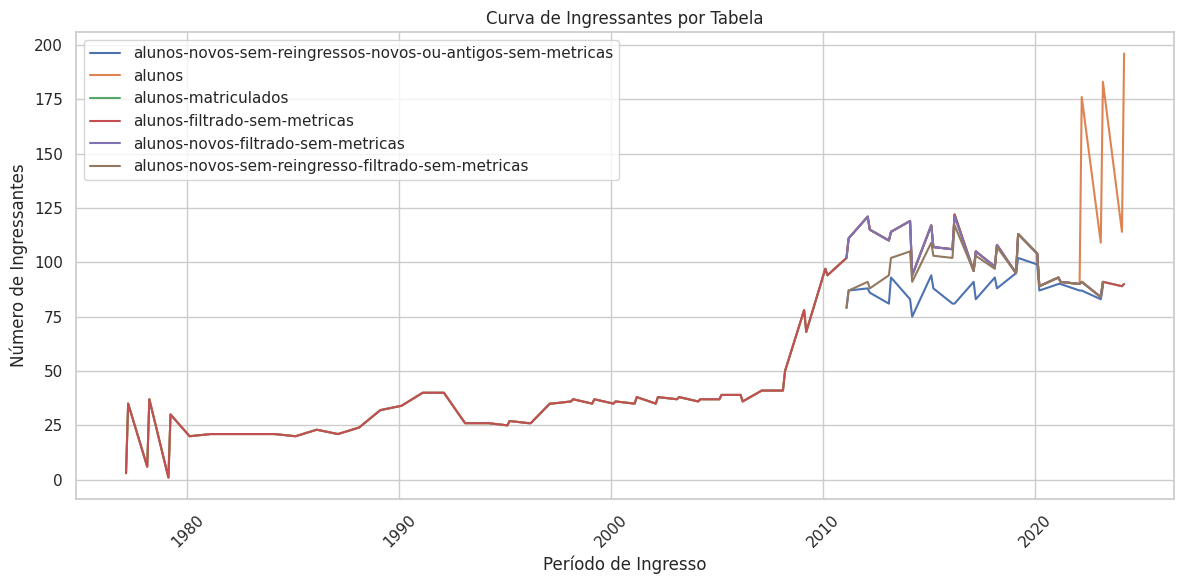

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Define uma função para plotar a curva de ingressantes por período de ingresso
def plotar_curva_ingressantes(tabelas):
    plt.figure(figsize=(12, 6))
    
    for nome, df in tabelas.items():
        if 'periodo_de_ingresso' in df.columns:
            # Conta quantos alunos ingressaram por período
            contagem = df['periodo_de_ingresso'].value_counts().sort_index()
            plt.plot(contagem.index, contagem.values, label=nome)
    
    plt.xlabel('Período de Ingresso')
    plt.ylabel('Número de Ingressantes')
    plt.title('Curva de Ingressantes por Tabela')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Chamada da função
plotar_curva_ingressantes(tabelas)


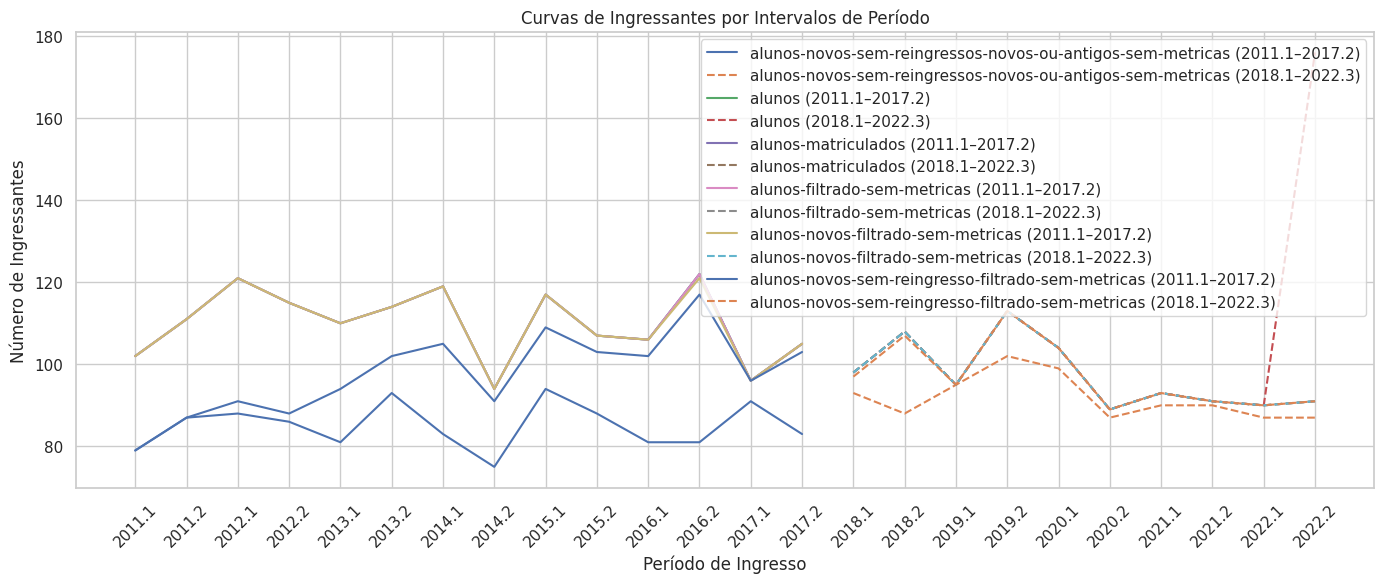

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_curva_ingressantes_por_periodo(tabelas):
    # Define os intervalos de períodos desejados
    intervalo_1 = [f"{ano}.{sem}" for ano in range(2011, 2018) for sem in [1, 2]]
    intervalo_2 = [f"{ano}.{sem}" for ano in range(2018, 2023) for sem in [1, 2, 3]]

    plt.figure(figsize=(14, 6))

    for nome, df in tabelas.items():
        if 'periodo_de_ingresso' in df.columns:
            # Garante que os valores são strings para comparação
            df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str)

            # Contagens para os dois intervalos
            contagem_1 = df[df['periodo_de_ingresso'].isin(intervalo_1)]['periodo_de_ingresso'].value_counts().sort_index()
            contagem_2 = df[df['periodo_de_ingresso'].isin(intervalo_2)]['periodo_de_ingresso'].value_counts().sort_index()

            # Plota ambas curvas
            plt.plot(contagem_1.index, contagem_1.values, label=f"{nome} (2011.1–2017.2)")
            plt.plot(contagem_2.index, contagem_2.values, linestyle='--', label=f"{nome} (2018.1–2022.3)")

    plt.xlabel('Período de Ingresso')
    plt.ylabel('Número de Ingressantes')
    plt.title('Curvas de Ingressantes por Intervalos de Período')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Chamada da função
plotar_curva_ingressantes_por_periodo(tabelas)


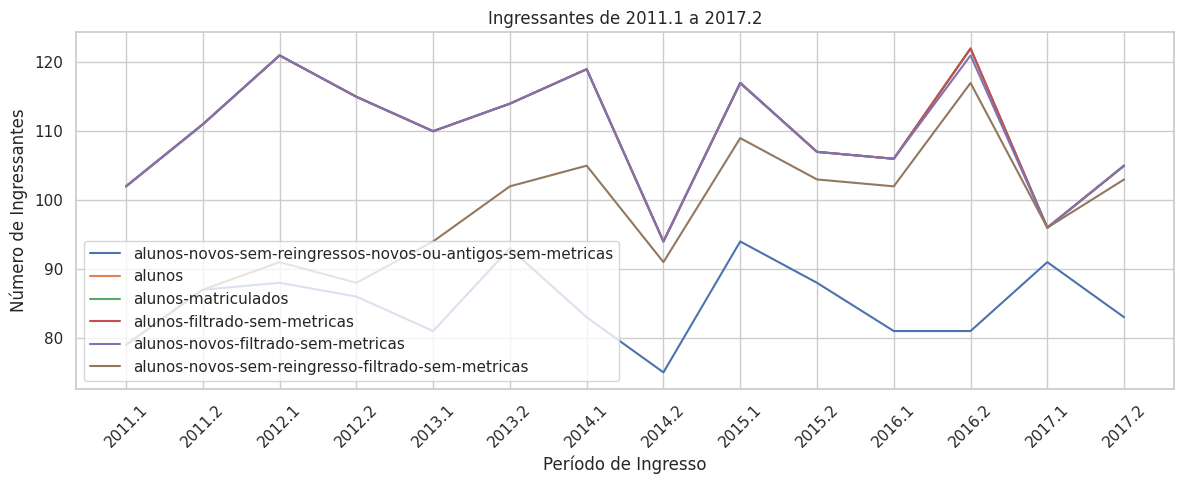

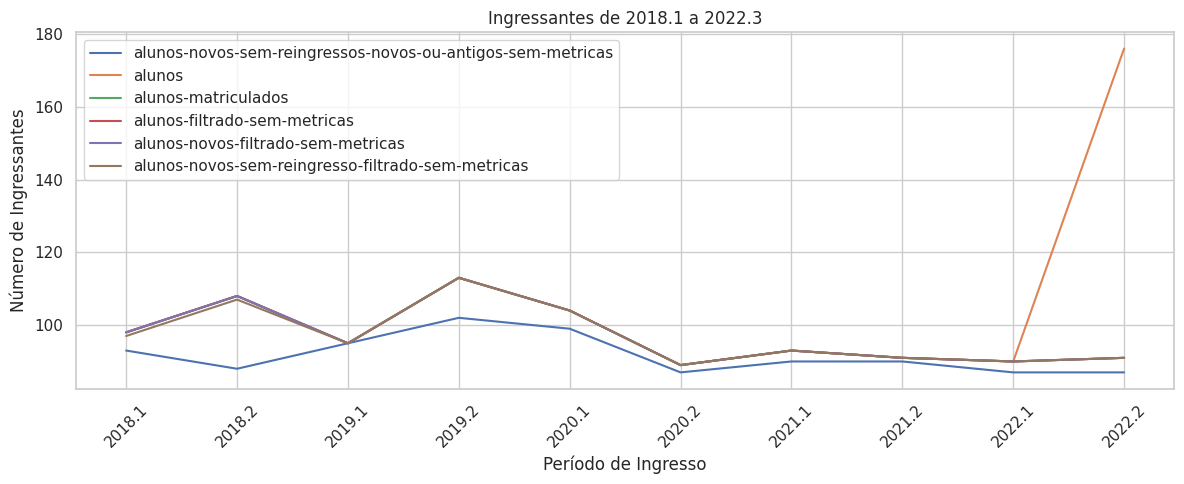

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_curvas_separadas(tabelas):
    # Define os dois intervalos de períodos
    intervalo_1 = [f"{ano}.{sem}" for ano in range(2011, 2018) for sem in [1, 2]]
    intervalo_2 = [f"{ano}.{sem}" for ano in range(2018, 2023) for sem in [1, 2, 3]]

    # Primeiro gráfico: 2011.1 a 2017.2
    plt.figure(figsize=(12, 5))
    for nome, df in tabelas.items():
        if 'periodo_de_ingresso' in df.columns:
            df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str)
            contagem_1 = df[df['periodo_de_ingresso'].isin(intervalo_1)]['periodo_de_ingresso'].value_counts().sort_index()
            plt.plot(contagem_1.index, contagem_1.values, label=nome)

    plt.title('Ingressantes de 2011.1 a 2017.2')
    plt.xlabel('Período de Ingresso')
    plt.ylabel('Número de Ingressantes')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Segundo gráfico: 2018.1 a 2022.3
    plt.figure(figsize=(12, 5))
    for nome, df in tabelas.items():
        if 'periodo_de_ingresso' in df.columns:
            df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str)
            contagem_2 = df[df['periodo_de_ingresso'].isin(intervalo_2)]['periodo_de_ingresso'].value_counts().sort_index()
            plt.plot(contagem_2.index, contagem_2.values, label=nome)

    plt.title('Ingressantes de 2018.1 a 2022.3')
    plt.xlabel('Período de Ingresso')
    plt.ylabel('Número de Ingressantes')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_curvas_separadas(tabelas)


### Distribuição de alunos por período de ingresso

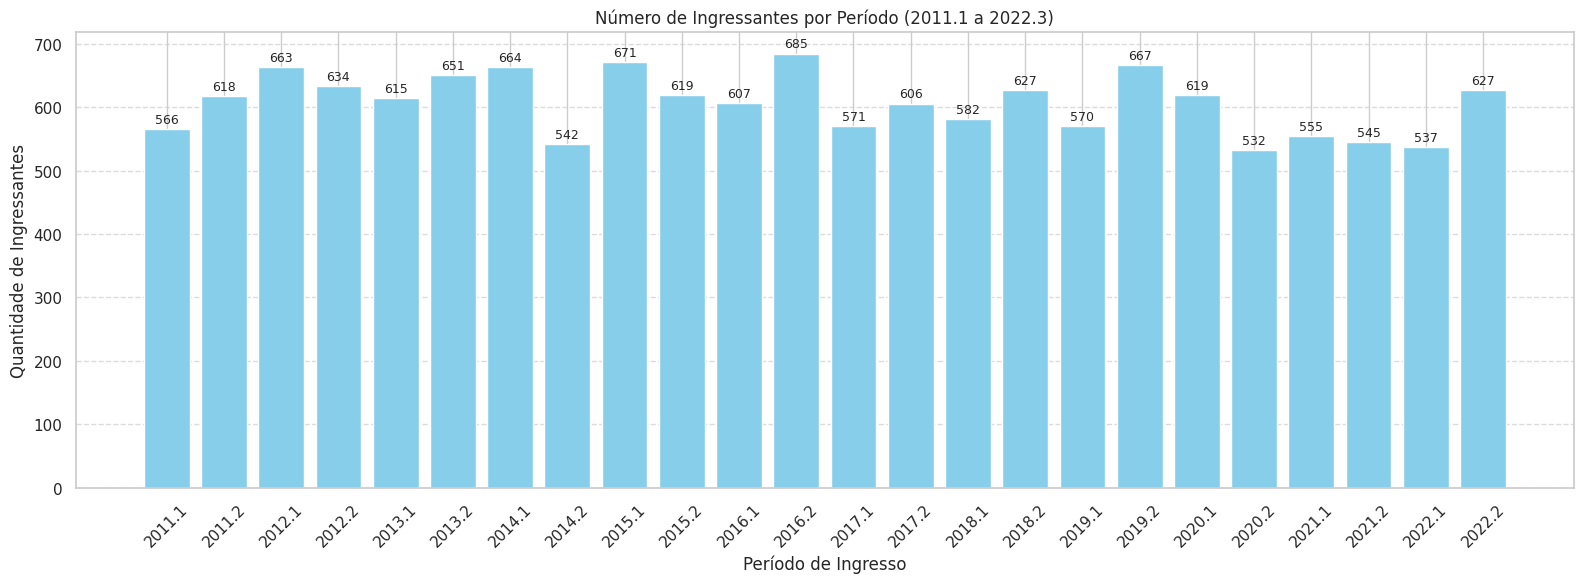

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def grafico_barras_ingressantes(tabelas):
    # Intervalo de períodos de interesse
    intervalos = [f"{ano}.{sem}" for ano in range(2011, 2023) for sem in [1, 2, 3] if not (ano == 2011 and sem == 0)]

    # Cria um DataFrame com contagem total por período, somando de todas as tabelas
    contagem_total = pd.Series(dtype=int)
    
    for nome, df in tabelas.items():
        if 'periodo_de_ingresso' in df.columns:
            df['periodo_de_ingresso'] = df['periodo_de_ingresso'].astype(str)
            contagem = df[df['periodo_de_ingresso'].isin(intervalos)]['periodo_de_ingresso'].value_counts()
            contagem_total = contagem_total.add(contagem, fill_value=0)

    # Organiza os dados
    contagem_total = contagem_total[contagem_total.index.isin(intervalos)]
    contagem_total = contagem_total.sort_index()

    # Cria o gráfico
    plt.figure(figsize=(16, 6))
    bars = plt.bar(contagem_total.index, contagem_total.values, color='skyblue')

    # Adiciona os valores acima de cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=9)

    plt.title('Número de Ingressantes por Período (2011.1 a 2022.3)')
    plt.xlabel('Período de Ingresso')
    plt.ylabel('Quantidade de Ingressantes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Chamada da função
grafico_barras_ingressantes(tabelas)


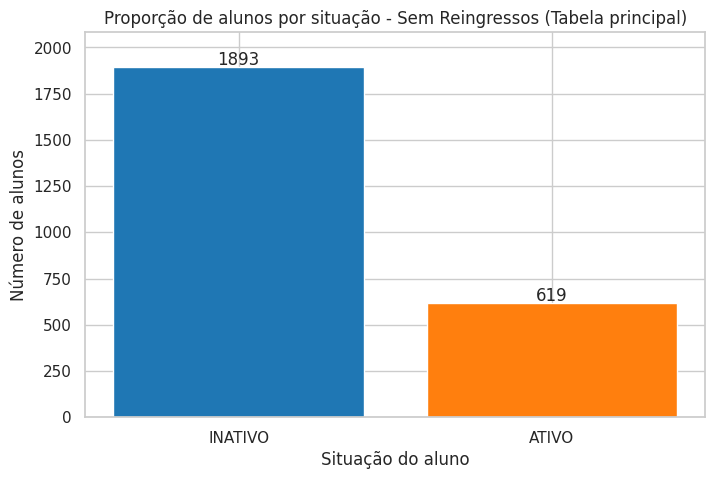

In [32]:
import matplotlib.pyplot as plt

# Selecionar a tabela relevante
df = tabelas['alunos-novos-sem-reingresso-filtrado-sem-metricas']

# Contar a frequência de cada situação
contagem_situacao = df['situacao'].value_counts()

# Preparar dados para o gráfico
labels = contagem_situacao.index
valores = contagem_situacao.values

# Criar gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(labels, valores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adicionar valores no topo das barras
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 10, f'{int(altura)}', ha='center', fontsize=12)

# Títulos e legendas
plt.title('Proporção de alunos por situação - Sem Reingressos (Tabela principal)')
plt.ylabel('Número de alunos')
plt.xlabel('Situação do aluno')
plt.ylim(0, max(valores)*1.1)

plt.show()


In [33]:
# Selecionar a tabela relevante
df = tabelas['alunos-novos-sem-reingresso-filtrado-sem-metricas']

# Verificar valores únicos e suas contagens na coluna 'situacao'
contagem_situacao = df['situacao'].value_counts()

print(contagem_situacao)


situacao
INATIVO    1893
ATIVO       619
Name: count, dtype: int64


In [35]:
# Seleciona a tabela específica
df = tabelas['alunos-novos-sem-reingresso-filtrado-sem-metricas']

# Exibe todos os valores únicos da coluna 'situacao'
valores_unicos = df['situacao'].unique()

print("Valores únicos na variável 'situacao':")
print(valores_unicos)


Valores únicos na variável 'situacao':
['ATIVO' 'INATIVO']


### Currículo 1999: ingressantes de 2011.1 a 2017.2

### Calcular:
1) As estatísticas de evasão ao final do primeiro período dos ingressantes entre 2011.1 e 2017.2, ou seja, para os ingressantes em 2011.1, verificar quem evadiu no 2011.2, para os que ingressaram em 2011.2, quem evadiu no 2012.1 e assim por diante.

In [46]:
# Função para calcular o próximo período semestral
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular evasão ao final do primeiro período após ingresso
def evasao_primeiro_periodo(df, inicio='2011.1', fim='2017.2'):
    # Filtra alunos que ingressaram no intervalo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria coluna com o período seguinte ao de ingresso
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(proximo_periodo)

    # Marca evasão ao final do primeiro período após ingresso
    df_filtrado['evadiu_no_primeiro_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa por período de ingresso e calcula total e evasão
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=('evadiu_no_primeiro_periodo', 'sum')
    )

    # Calcula taxa de evasão
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Usando a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'
tabela_alunos = tabelas['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas']
resultado = evasao_primeiro_periodo(tabela_alunos)
print(resultado)


   periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0               2011.1                  79             7     0.088608
1               2011.2                  87             8     0.091954
2               2012.1                  88            13     0.147727
3               2012.2                  86             9     0.104651
4               2013.1                  81             7     0.086420
..                 ...                 ...           ...          ...
9               2015.2                  88             8     0.090909
10              2016.1                  81            10     0.123457
11              2016.2                  81             8     0.098765
12              2017.1                  91             7     0.076923
13              2017.2                  83             5     0.060241

[14 rows x 4 columns]


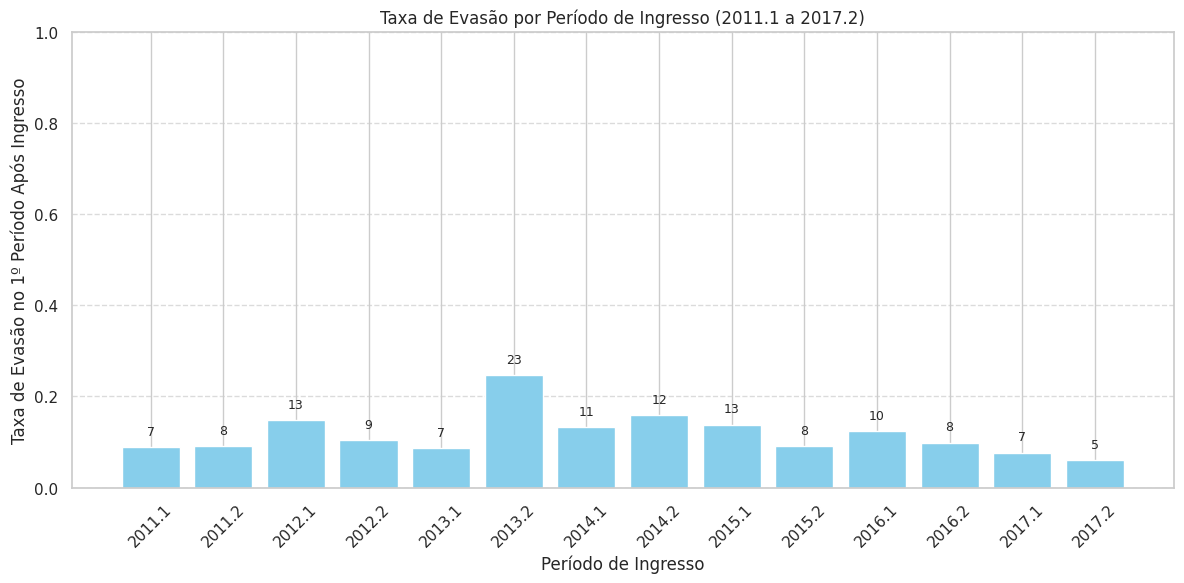

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.bar(resultado['periodo_de_ingresso'], resultado['taxa_evasao'], color='skyblue')
plt.xlabel('Período de Ingresso')
plt.ylabel('Taxa de Evasão no 1º Período Após Ingresso')
plt.title('Taxa de Evasão por Período de Ingresso (2011.1 a 2017.2)')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona o número absoluto de evadidos acima de cada barra
for bar, evadidos in zip(bars, resultado['total_evasao']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, str(evadidos), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### 2) As estatísticas de evasão ao final do segundo período dos ingressantes entre 2011.1 e 2017.1, ou seja, para os ingressantes em 2011.1, verificar quem evadiu no 2012.1, para os que ingressaram em 2011.2, quem evadiu no 2012.2 e assim por diante.


In [50]:
import pandas as pd

# Função para somar N períodos semestrais ao período no formato 'YYYY.S'
def somar_periodos(periodo, n=2):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    
    semestre += n
    while semestre > 2:
        semestre -= 2
        ano += 1
    
    return f"{ano}.{semestre}"

# Seleciona tabela com os dados (modifique para a que preferir)
df = tabelas['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'].copy()

# Filtra ingressos entre 2011.1 e 2017.1 (pois o segundo período precisa existir)
df = df[(df['periodo_de_ingresso'] >= '2011.1') & (df['periodo_de_ingresso'] <= '2017.1')]

# Calcula o período de evasão esperado (ingresso + 2 períodos)
df['periodo_evasao_esperado'] = df['periodo_de_ingresso'].apply(lambda x: somar_periodos(x, n=2))

# Marca se evadiu no segundo período (compara com periodo_de_evasao real)
df['evadiu_segundo_periodo'] = (df['periodo_de_evasao'] == df['periodo_evasao_esperado']).astype(int)

# Agrupa por período de ingresso, calcula taxa de evasão e total de evadidos
resultado_2p = df.groupby('periodo_de_ingresso').agg(
    total_ingressantes=('cpf', 'count'),
    total_evasao=('evadiu_segundo_periodo', 'sum')
).reset_index()

resultado_2p['taxa_evasao'] = resultado_2p['total_evasao'] / resultado_2p['total_ingressantes']

resultado_2p


,periodo_de_ingresso,total_ingressantes,total_evasao,taxa_evasao
0,2011.1,79,5,0.063291
1,2011.2,87,16,0.183908
2,2012.1,88,8,0.090909
3,2012.2,86,6,0.069767
4,2013.1,81,6,0.074074
...,...,...,...,...
8,2015.1,94,4,0.042553
9,2015.2,88,9,0.102273
10,2016.1,81,3,0.037037
11,2016.2,81,3,0.037037


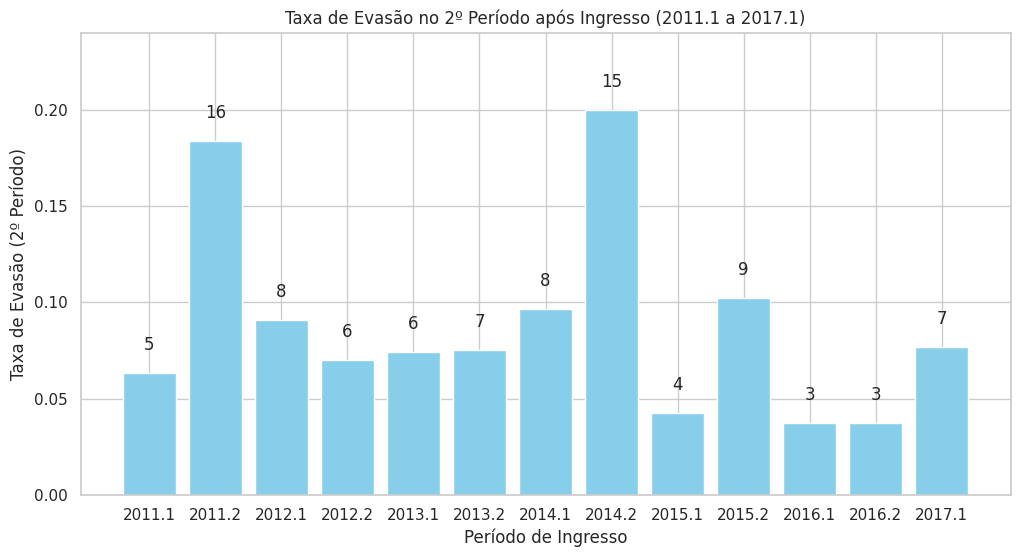

In [51]:
import matplotlib.pyplot as plt

# Usando o resultado do cálculo da evasão no segundo período (resultado_2p)

plt.figure(figsize=(12, 6))
bars = plt.bar(resultado_2p['periodo_de_ingresso'], resultado_2p['taxa_evasao'], color='skyblue')

plt.xlabel('Período de Ingresso')
plt.ylabel('Taxa de Evasão (2º Período)')
plt.title('Taxa de Evasão no 2º Período após Ingresso (2011.1 a 2017.1)')
plt.ylim(0, resultado_2p['taxa_evasao'].max() * 1.2)

# Adiciona o total de evadidos em cima de cada barra
for bar, total in zip(bars, resultado_2p['total_evasao']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, str(total), ha='center', va='bottom')

plt.show()


Esse gráfico mostra a taxa de evasão para cada turma de ingressantes no segundo período após o ingresso, com o número absoluto de alunos que evadiram indicado acima das barras

### 3) As estatísticas de evasão ao final do terceiro período dos ingressantes entre 2011.1 e 2016.2, ou seja, para os ingressantes em 2011.1, verificar quem evadiu no 2012.2, para os que ingressaram em 2011.2, quem evadiu no 2013.1 e assim por diante.

In [52]:
import pandas as pd

# Selecionar a tabela de alunos
df = tabelas['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'].copy()

# Função para somar períodos (ex: 2011.1 + 3 períodos = 2012.2)
def soma_periodo(periodo, n=3):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    semestre += n
    while semestre > 2:
        ano += 1
        semestre -= 2
    return f"{ano}.{semestre}"

# Filtrar ingressos entre 2011.1 e 2016.2
periodos_validos = pd.date_range('2011-01-01', '2016-07-01', freq='6M').strftime('%Y.%m')
# Como os períodos estão em formato 'ano.semestre' com semestres 1 ou 2, criamos lista manual:
periodos_validos = [f"{ano}.{semestre}" for ano in range(2011, 2017) for semestre in [1, 2]]
periodos_validos = [p for p in periodos_validos if p <= '2016.2' and p >= '2011.1']

df = df[df['periodo_de_ingresso'].isin(periodos_validos)]

# Calcular o período correspondente para verificar evasão (ingresso + 3 períodos)
df['periodo_para_evasao'] = df['periodo_de_ingresso'].apply(lambda x: soma_periodo(x, 3))

# Contar total ingressantes por período
total_ingressantes = df.groupby('periodo_de_ingresso')['cpf'].nunique().reset_index(name='total_ingressantes')

# Contar total evadidos onde periodo_de_evasao == periodo_para_evasao
evasao_3p = df[df['periodo_de_evasao'] == df['periodo_para_evasao']].groupby('periodo_de_ingresso')['cpf'].nunique().reset_index(name='total_evasao')

# Juntar total ingressantes e total evadidos
resultado_3p = pd.merge(total_ingressantes, evasao_3p, on='periodo_de_ingresso', how='left')
resultado_3p['total_evasao'] = resultado_3p['total_evasao'].fillna(0).astype(int)

# Calcular taxa de evasão (%)
resultado_3p['taxa_evasao'] = (resultado_3p['total_evasao'] / resultado_3p['total_ingressantes']) * 100

resultado_3p


/tmp/ipykernel_30423/3051685675.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  periodos_validos = pd.date_range('2011-01-01', '2016-07-01', freq='6M').strftime('%Y.%m')


,periodo_de_ingresso,total_ingressantes,total_evasao,taxa_evasao
0,2011.1,79,7,8.860759
1,2011.2,87,10,11.494253
2,2012.1,88,7,7.954545
3,2012.2,86,6,6.976744
4,2013.1,81,10,12.345679
...,...,...,...,...
7,2014.2,75,6,8.000000
8,2015.1,94,5,5.319149
9,2015.2,88,10,11.363636
10,2016.1,81,8,9.876543


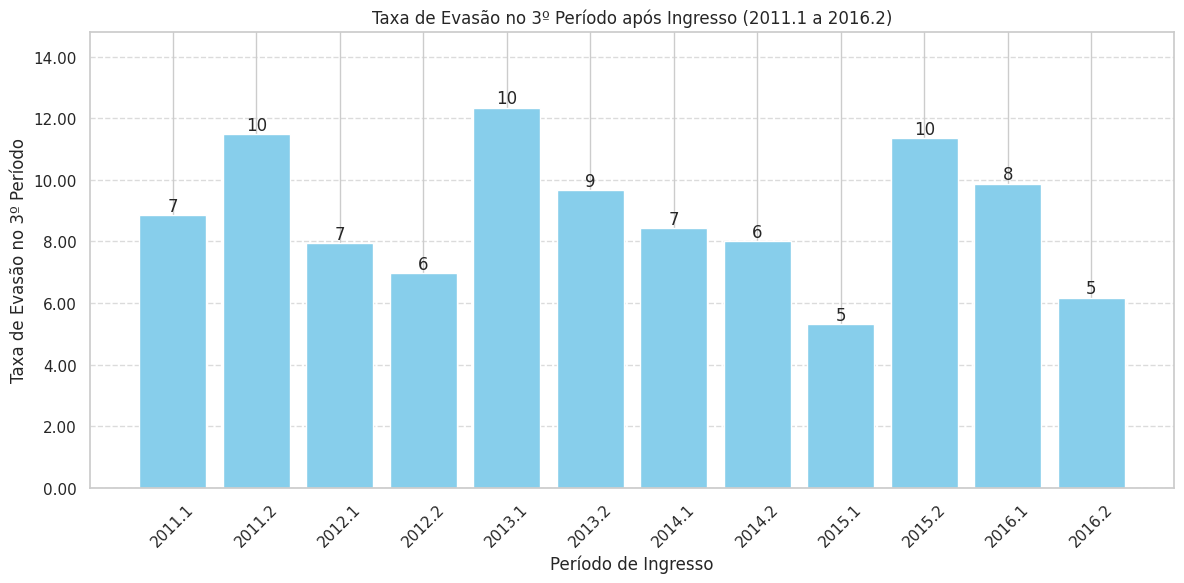

In [66]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))
bars = plt.bar(resultado_3p['periodo_de_ingresso'], resultado_3p['taxa_evasao'], color='skyblue')

plt.xlabel('Período de Ingresso')
plt.ylabel('Taxa de Evasão no 3º Período')
plt.title('Taxa de Evasão no 3º Período após Ingresso (2011.1 a 2016.2)')
plt.ylim(0, resultado_3p['taxa_evasao'].max() * 1.2)

# Formata o eixo y com números decimais
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))

# Adiciona o total de evadidos em cima de cada barra
for bar, total in zip(bars, resultado_3p['total_evasao']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, str(total), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4) As estatísticas de evasão ao final do quarto período dos ingressantes entre 2011.1 e 2016.1, ou seja, para os ingressantes em 2011.1, verificar quem evadiu no 2013.1, para os que ingressaram em 2011.2, quem evadiu no 2013.2 e assim por diante.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecionar a tabela de alunos
df = tabelas['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'].copy()

# Função para somar períodos (ex: 2011.1 + 4 períodos = 2013.1)
def soma_periodo(periodo, n=4):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    semestre += n
    while semestre > 2:
        ano += 1
        semestre -= 2
    return f"{ano}.{semestre}"

# Criar lista de períodos válidos de ingresso (2011.1 a 2016.1)
periodos_validos = [f"{ano}.{semestre}" for ano in range(2011, 2017) for semestre in [1, 2]]
periodos_validos = [p for p in periodos_validos if p >= '2011.1' and p <= '2016.1']

# Filtrar ingressos válidos
df = df[df['periodo_de_ingresso'].isin(periodos_validos)]

# Calcular o período de evasão esperado
df['periodo_para_evasao'] = df['periodo_de_ingresso'].apply(lambda x: soma_periodo(x, 4))

# Total de ingressantes por período
total_ingressantes = df.groupby('periodo_de_ingresso')['cpf'].nunique().reset_index(name='total_ingressantes')

# Total de evadidos no período esperado
evasao_4p = df[df['periodo_de_evasao'] == df['periodo_para_evasao']].groupby('periodo_de_ingresso')['cpf'].nunique().reset_index(name='total_evasao')

# Juntar resultados
resultado_4p = pd.merge(total_ingressantes, evasao_4p, on='periodo_de_ingresso', how='left')
resultado_4p['total_evasao'] = resultado_4p['total_evasao'].fillna(0).astype(int)

# Calcular taxa de evasão
resultado_4p['taxa_evasao'] = (resultado_4p['total_evasao'] / resultado_4p['total_ingressantes']) * 100

# Visualizar resultado
print(resultado_4p)

   periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0               2011.1                  79            13    16.455696
1               2011.2                  87            14    16.091954
2               2012.1                  88            14    15.909091
3               2012.2                  86            13    15.116279
4               2013.1                  81            18    22.222222
..                 ...                 ...           ...          ...
6               2014.1                  83            12    14.457831
7               2014.2                  75             5     6.666667
8               2015.1                  94             4     4.255319
9               2015.2                  88             6     6.818182
10              2016.1                  81             6     7.407407

[11 rows x 4 columns]


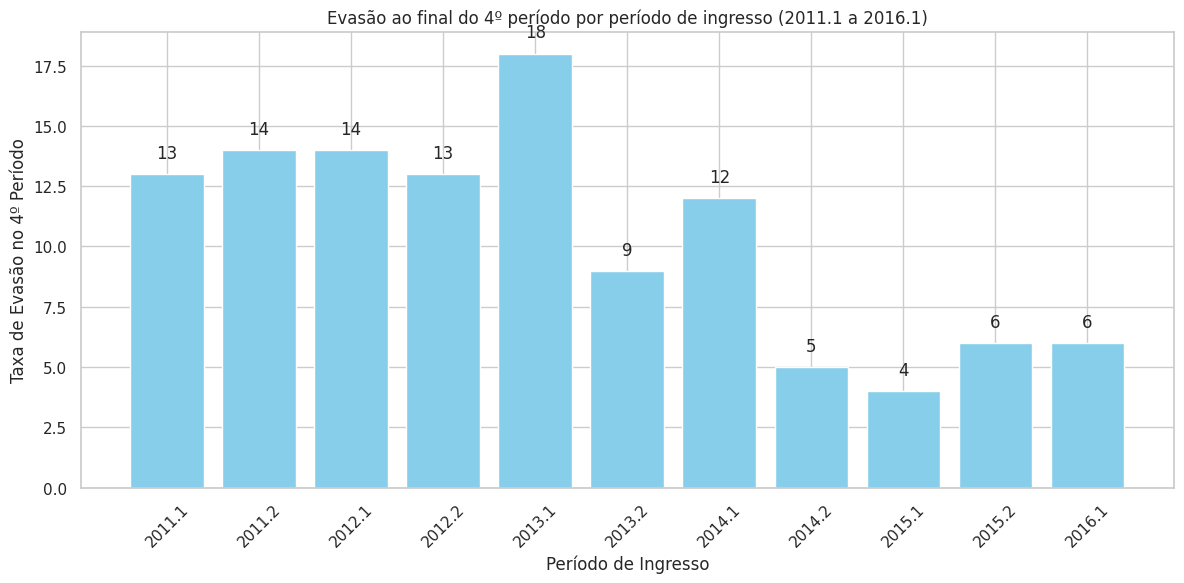

In [70]:
# Gráfico de barras com rótulos
plt.figure(figsize=(12, 6))
bars = plt.bar(resultado_4p['periodo_de_ingresso'], resultado_4p['total_evasao'], color='skyblue')
plt.title('Evasão ao final do 4º período por período de ingresso (2011.1 a 2016.1)')
plt.xlabel('Período de Ingresso')
plt.ylabel('Taxa de Evasão no 4º Período')
plt.xticks(rotation=45)

# Adicionar rótulos acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Etapa 2: Estratificação e estatísticas por variável

In [120]:
print(tabela_alunos.columns)


Index(['cpf', 'matricula', 'periodo_de_ingresso', 'forma_de_ingresso',
       'codigo_do_curriculo', 'estado_civil', 'sexo', 'data_de_nascimento',
       'cor', 'ano_de_conclusao_ensino_medio', 'tipo_de_ensino_medio',
       'politica_afirmativa', 'situacao', 'motivo_de_evasao',
       'periodo_de_evasao'],
      dtype='object')


### Cálculo das taxas de evasão por período

In [121]:
def calcular_evasao_multiplos_periodos(df, inicio='2011.1', fim='2017.2'):
    df = df.copy()

    # Filtra alunos no intervalo de ingresso
    df = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)]

    # Gera os próximos períodos (1º ao 4º)
    df['p1'] = df['periodo_de_ingresso'].apply(proximo_periodo)
    df['p2'] = df['p1'].apply(proximo_periodo)
    df['p3'] = df['p2'].apply(proximo_periodo)
    df['p4'] = df['p3'].apply(proximo_periodo)

    # Cria colunas booleanas para evasão em cada período
    for i in range(1, 5):
        df[f'evadiu_p{i}'] = df['periodo_de_evasao'] == df[f'p{i}']

    return df


### Função para calcular estatísticas por variável

In [122]:
def estatisticas_por_variavel(df, variavel, periodo):
    col_evasao = f'evadiu_p{periodo}'

    df_periodo = df.groupby(variavel).agg(
        total=('cpf', 'count'),
        evasoes=(col_evasao, 'sum')
    ).reset_index()

    df_periodo['taxa_evasao'] = df_periodo['evasoes'] / df_periodo['total']
    media = df_periodo['taxa_evasao'].mean()
    desvio = df_periodo['taxa_evasao'].std()

    return df_periodo[[variavel, 'total', 'evasoes', 'taxa_evasao']], media, desvio


### Uso para o sexo no 1º período

In [123]:
df_evasao = calcular_evasao_multiplos_periodos(tabela_alunos)

res_sexo_p1, media_p1, std_p1 = estatisticas_por_variavel(df_evasao, 'sexo', periodo=1)
print(f"[Sexo - 1º período] Média: {media_p1:.4f}, Desvio Padrão: {std_p1:.4f}")
print(res_sexo_p1)


[Sexo - 1º período] Média: 0.1259, Desvio Padrão: 0.0154
        sexo  total  evasoes  taxa_evasao
0   FEMININO    190       26     0.136842
1  MASCULINO   1000      115     0.115000


### Funções

In [124]:
import pandas as pd

# Função auxiliar para calcular o próximo período semestral
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para preparar os dados com os 4 períodos e flags de evasão
def calcular_evasao_multiplos_periodos(df, inicio='2011.1', fim='2017.2'):
    df = df.copy()
    df = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)]
    df['p1'] = df['periodo_de_ingresso'].apply(proximo_periodo)
    df['p2'] = df['p1'].apply(proximo_periodo)
    df['p3'] = df['p2'].apply(proximo_periodo)
    df['p4'] = df['p3'].apply(proximo_periodo)

    for i in range(1, 5):
        df[f'evadiu_p{i}'] = df['periodo_de_evasao'] == df[f'p{i}']
    
    return df

# Função que calcula as estatísticas por variável e por período
def estatisticas_por_variavel(df, variavel, periodo):
    col_evasao = f'evadiu_p{periodo}'
    
    df_periodo = df.groupby(variavel).agg(
        total=('cpf', 'count'),
        evasoes=(col_evasao, 'sum')
    ).reset_index()
    
    df_periodo['taxa_evasao'] = df_periodo['evasoes'] / df_periodo['total']
    media = df_periodo['taxa_evasao'].mean()
    desvio = df_periodo['taxa_evasao'].std()
    
    return df_periodo, media, desvio


### Geração do Relatório

In [125]:
# Lista de variáveis explicativas
variaveis = [
    'sexo',
    'cor',
    'estado_civil',
    'politica_afirmativa',
    'forma_de_ingresso',
    'tipo_de_ensino_medio'
]

# Geração da base com períodos e evasões
df_evasao = calcular_evasao_multiplos_periodos(tabela_alunos)

# Loop geral para relatório
for periodo in range(1, 5):
    print(f"\n====== Estatísticas de Evasão - Período {periodo} ======")
    for var in variaveis:
        df_resultado, media, desvio = estatisticas_por_variavel(df_evasao, var, periodo)
        print(f"\n[{var.upper()} - {periodo}º período] Média: {media:.4f}, Desvio Padrão: {desvio:.4f}")
        print(df_resultado)



====== Estatísticas de Evasão - Período 1 ======

[SEXO - 1º período] Média: 0.1259, Desvio Padrão: 0.0154
        sexo  total  evasoes  taxa_evasao
0   FEMININO    190       26     0.136842
1  MASCULINO   1000      115     0.115000

[COR - 1º período] Média: 0.1608, Desvio Padrão: 0.1215
             cor  total  evasoes  taxa_evasao
0        Amarela     36        7     0.194444
1         Branca    609       62     0.101806
2       Indígena      2        0     0.000000
3  Não declarada     25        9     0.360000
4          Parda    457       51     0.111597
5          Preta     61       12     0.196721

[ESTADO_CIVIL - 1º período] Média: 0.2764, Desvio Padrão: 0.3310
  estado_civil  total  evasoes  taxa_evasao
0            -      4        3     0.750000
1       Casado     37        9     0.243243
2   Divorciado      1        0     0.000000
3     Solteiro   1148      129     0.112369

[POLITICA_AFIRMATIVA - 1º período] Média: 0.1018, Desvio Padrão: 0.0620
  politica_afirmativa  total

### Geração de gráfico de barras para taxa de evasão

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


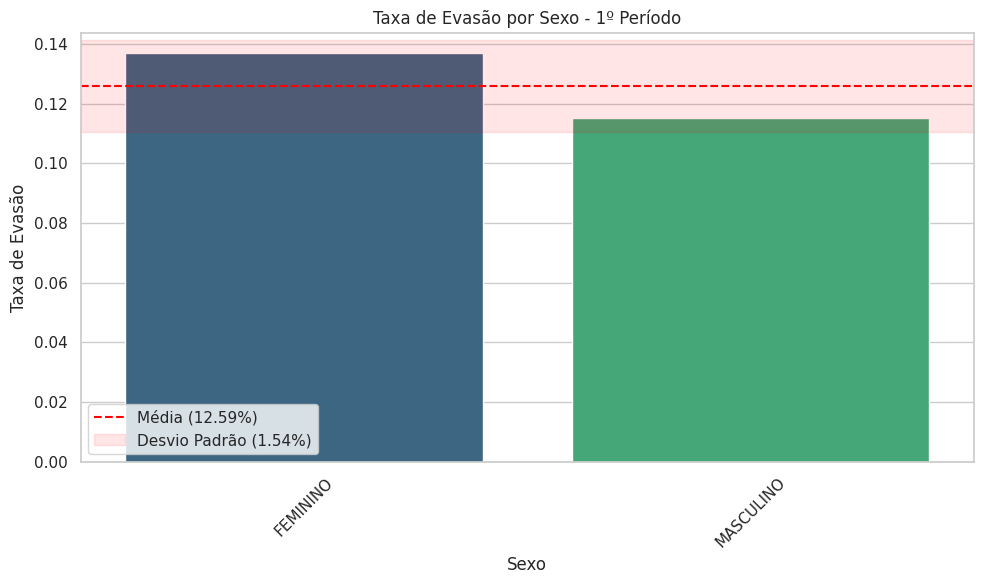

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


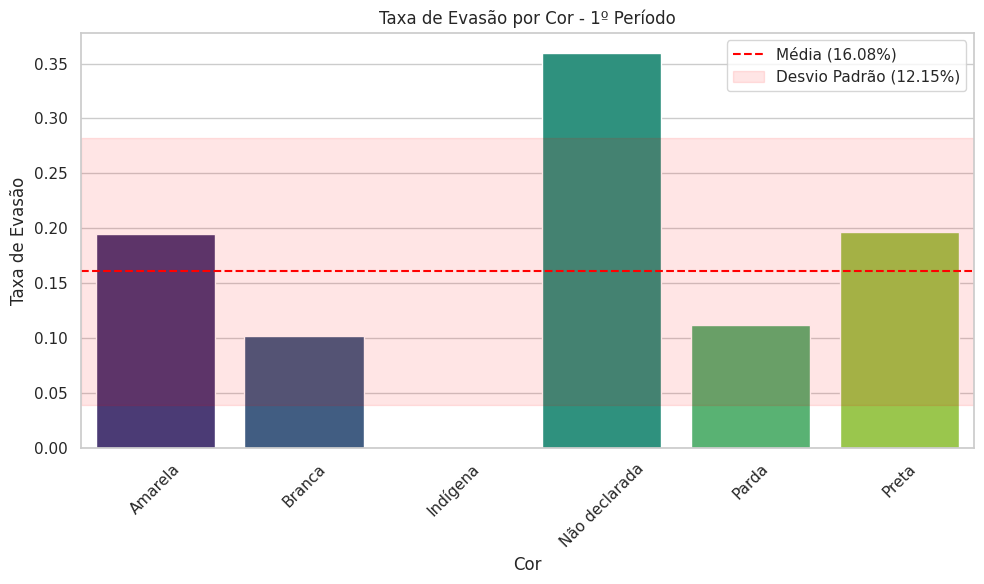

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


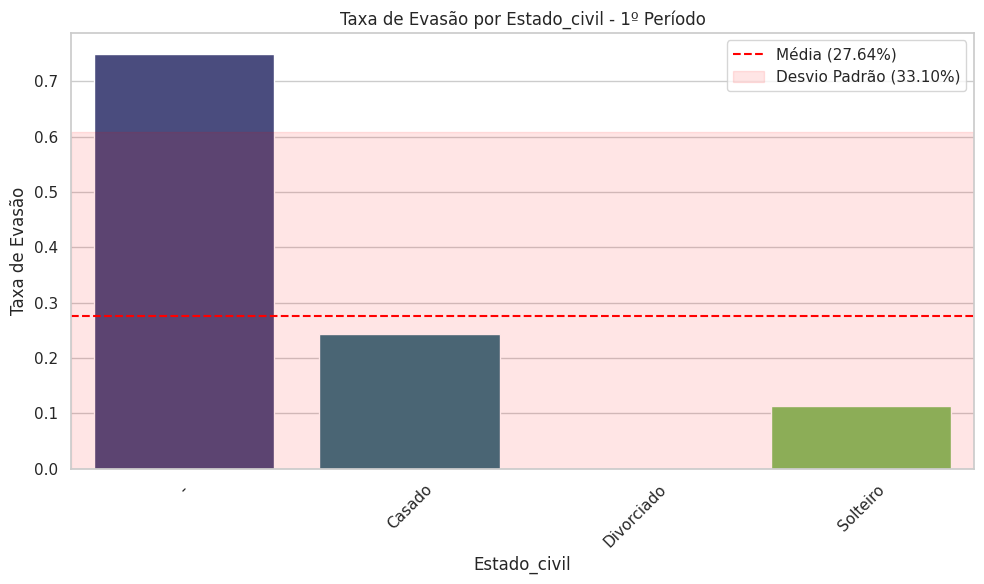

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


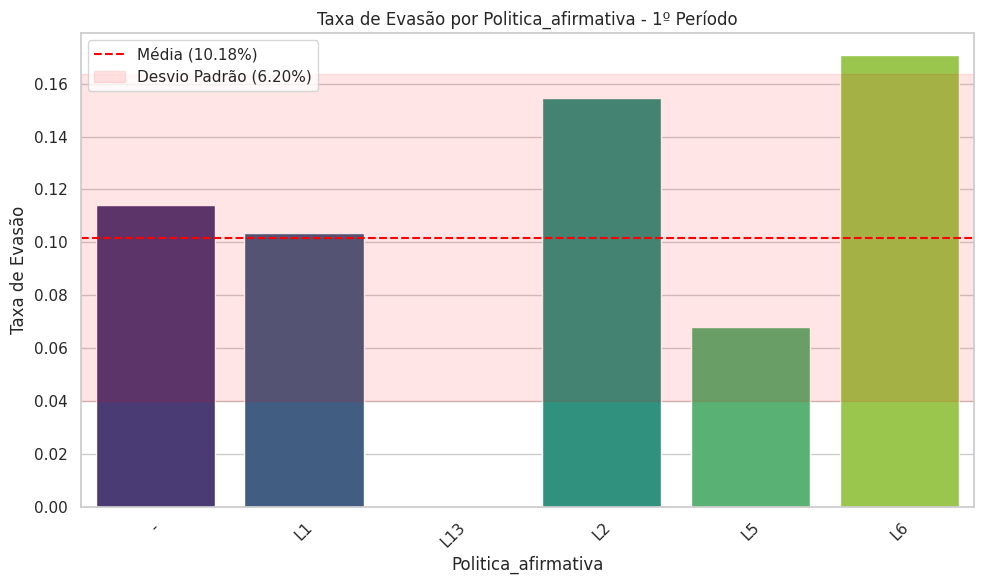

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


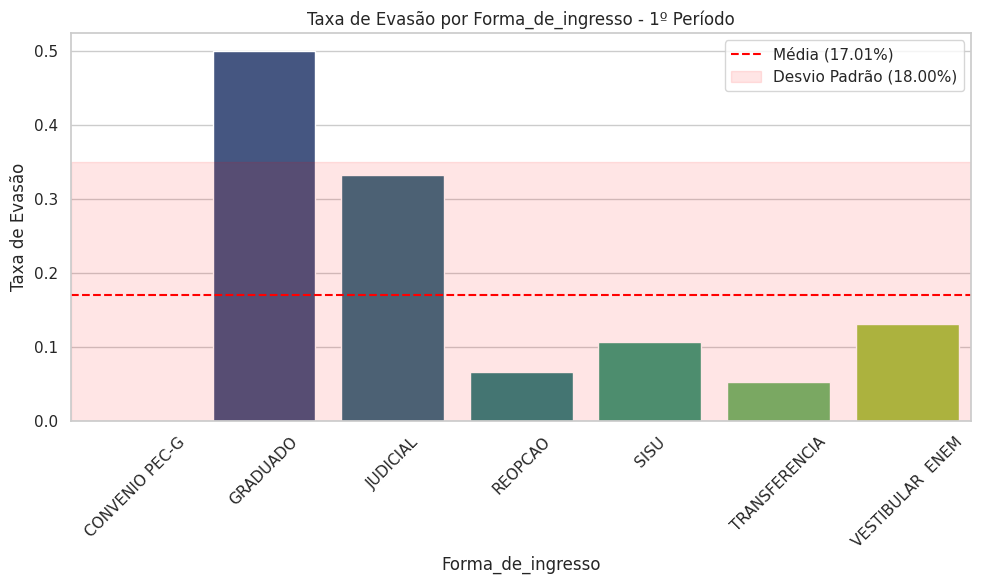

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


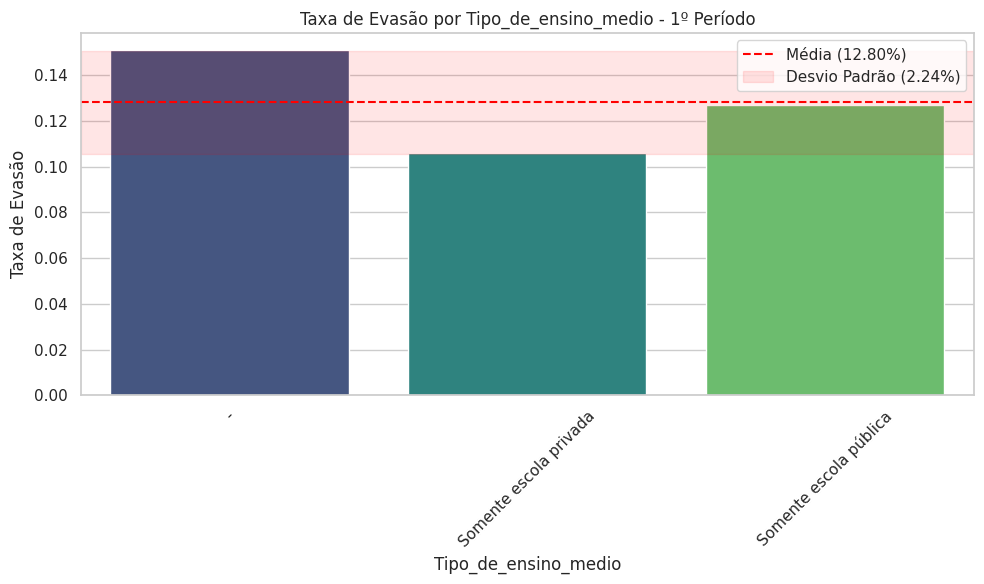

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


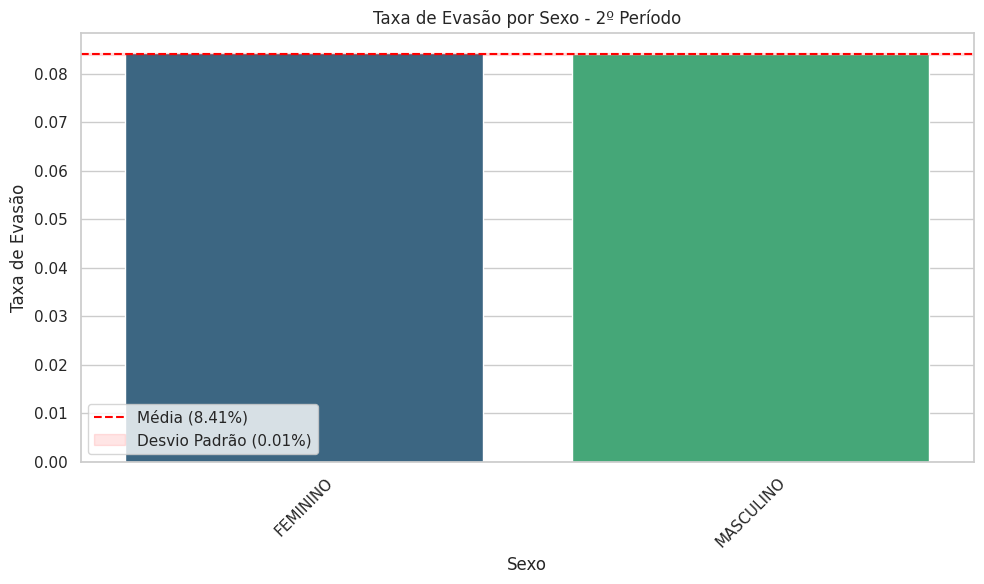

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


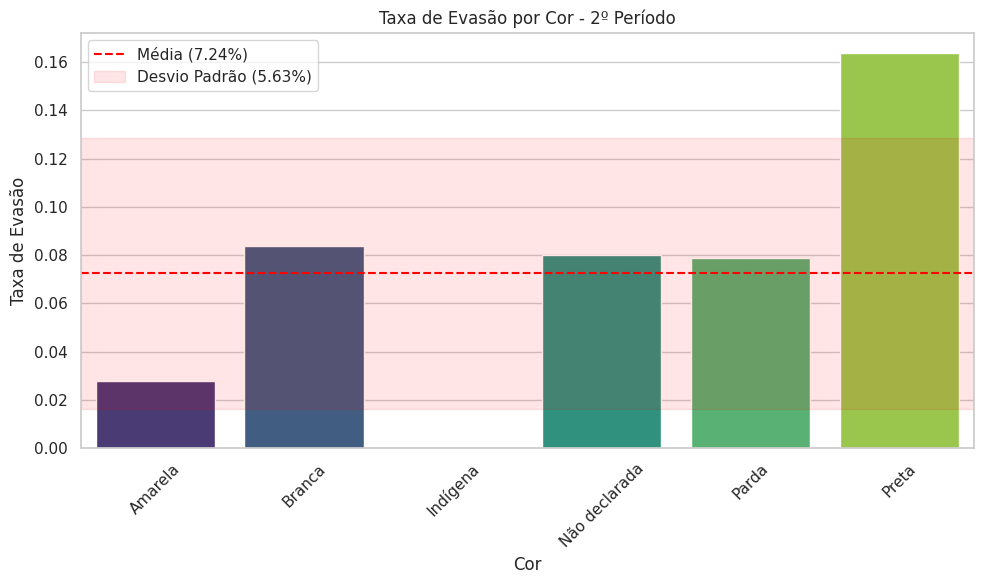

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


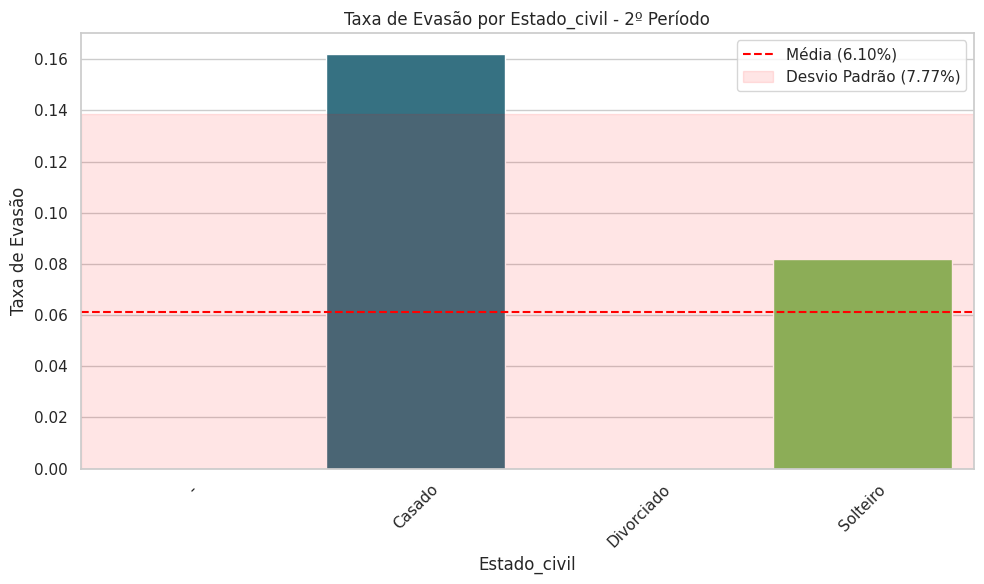

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


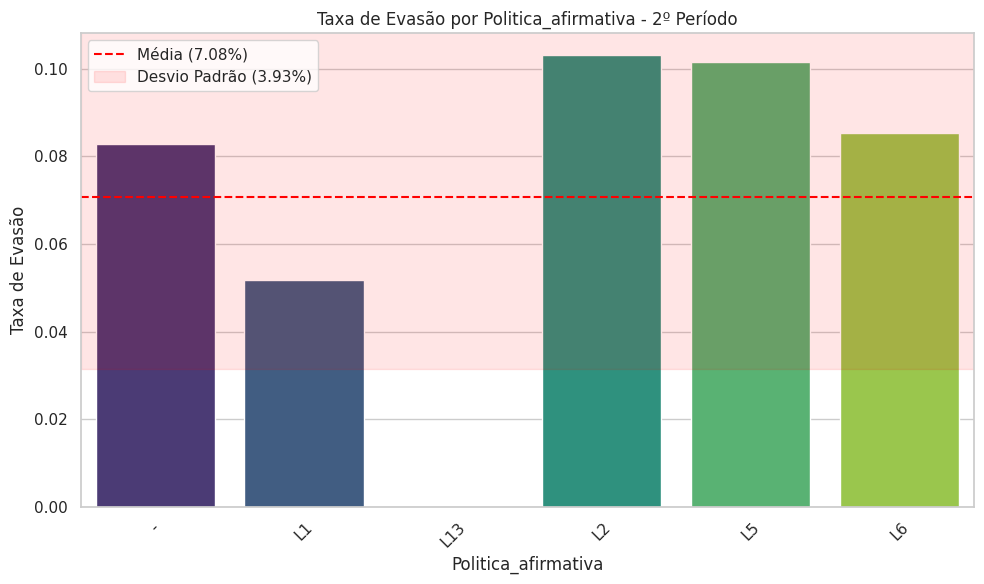

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


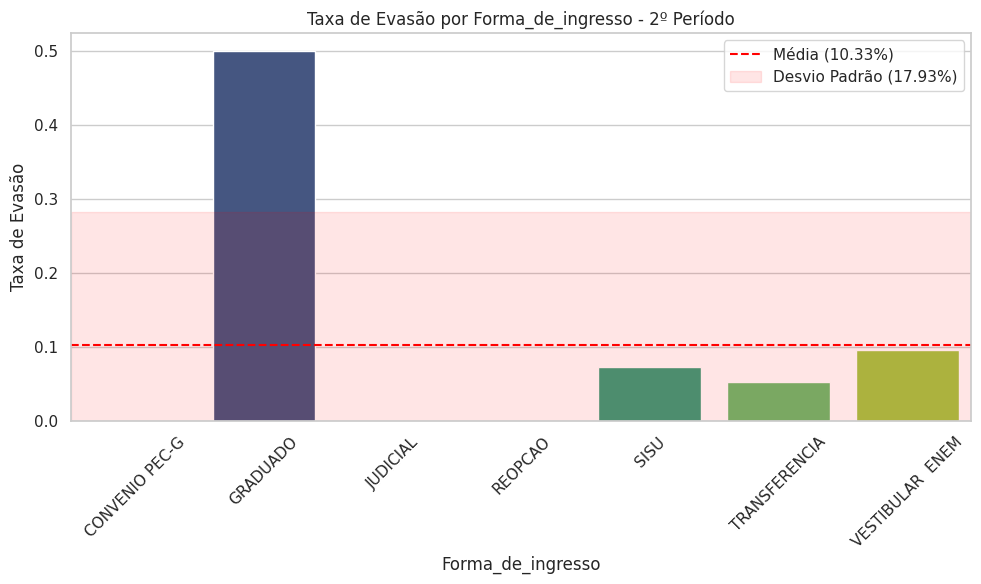

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


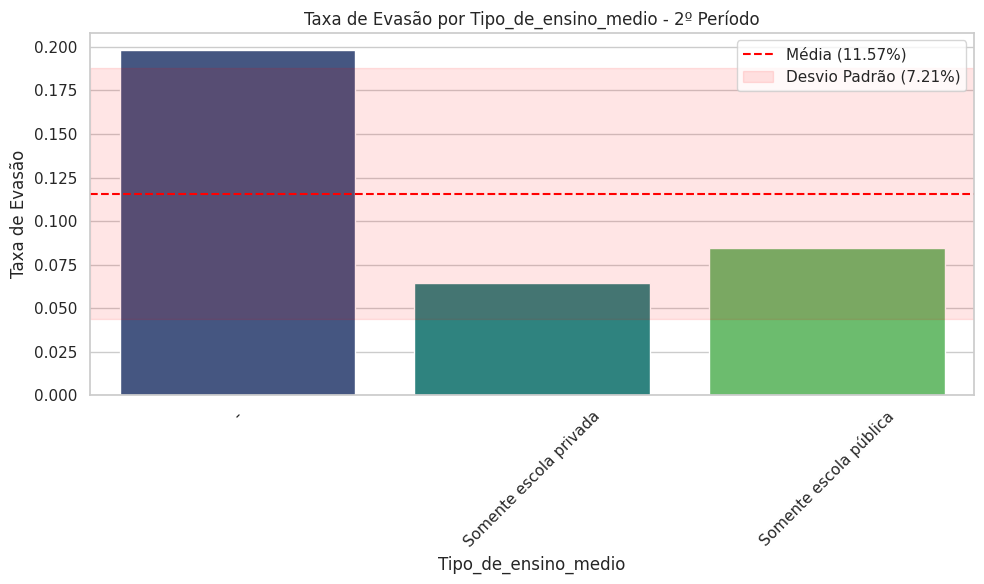

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


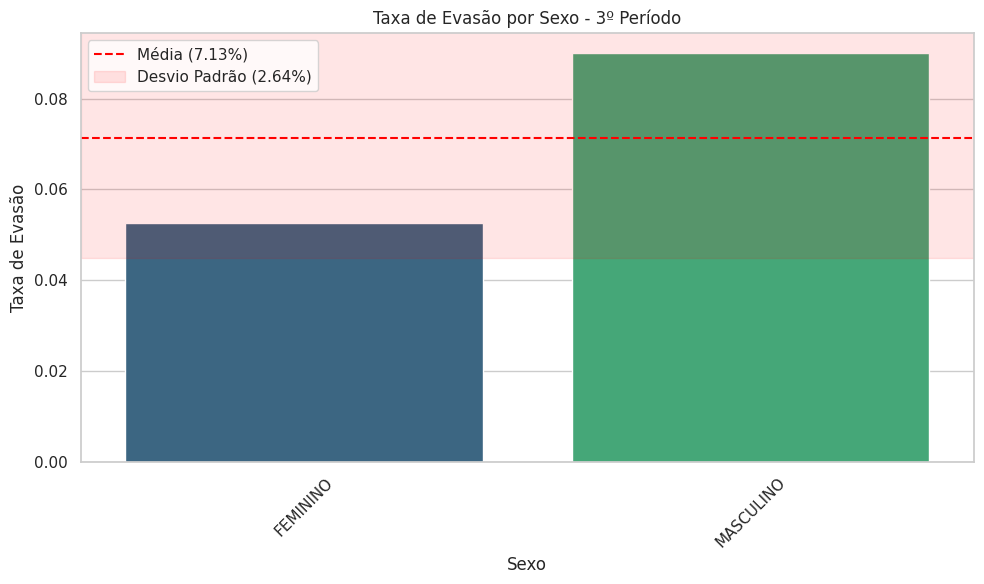

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


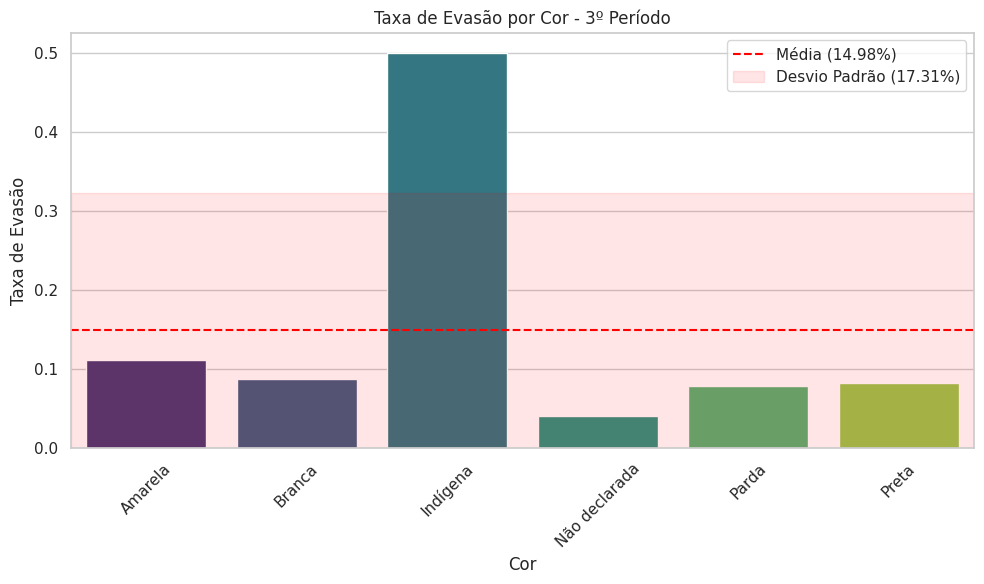

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


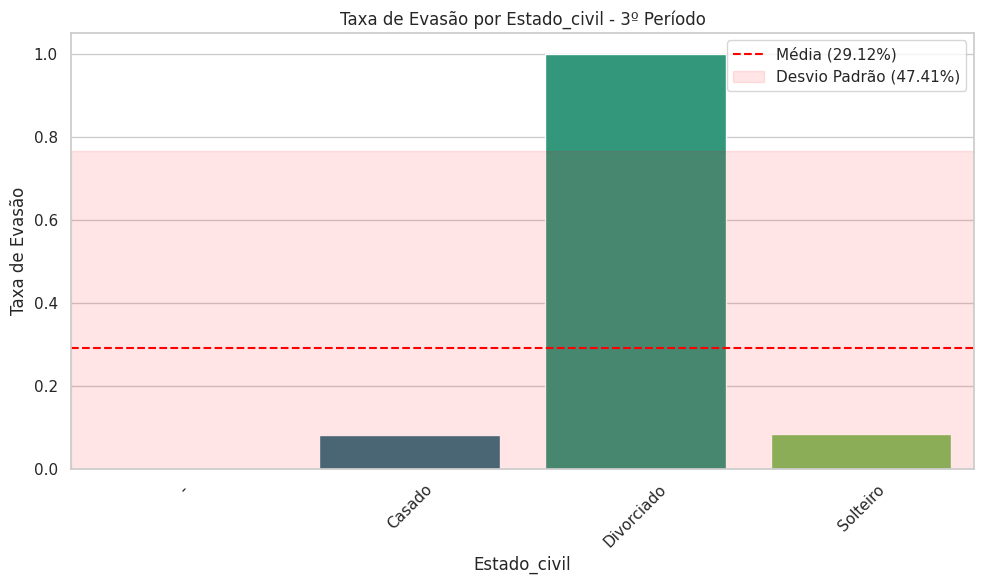

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


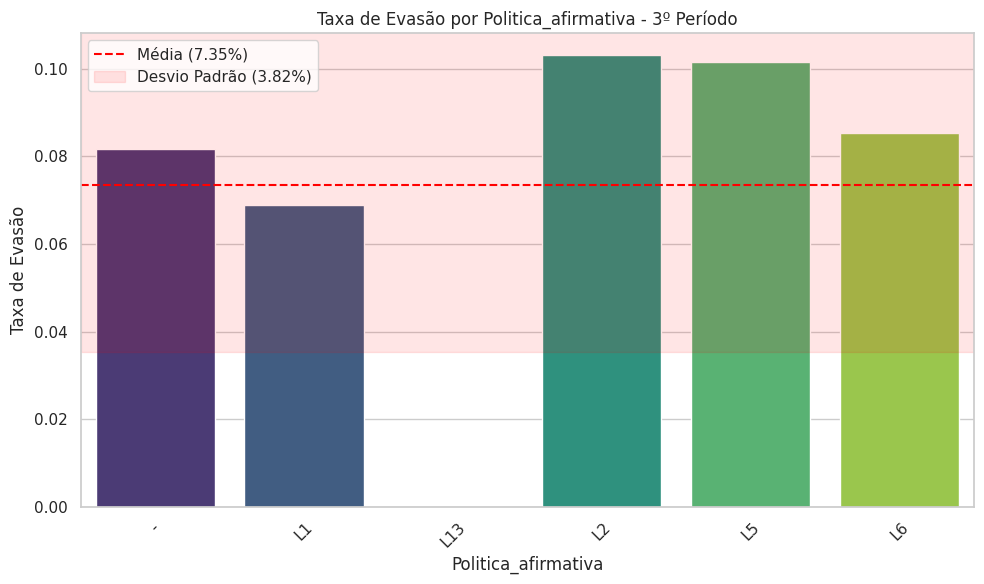

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


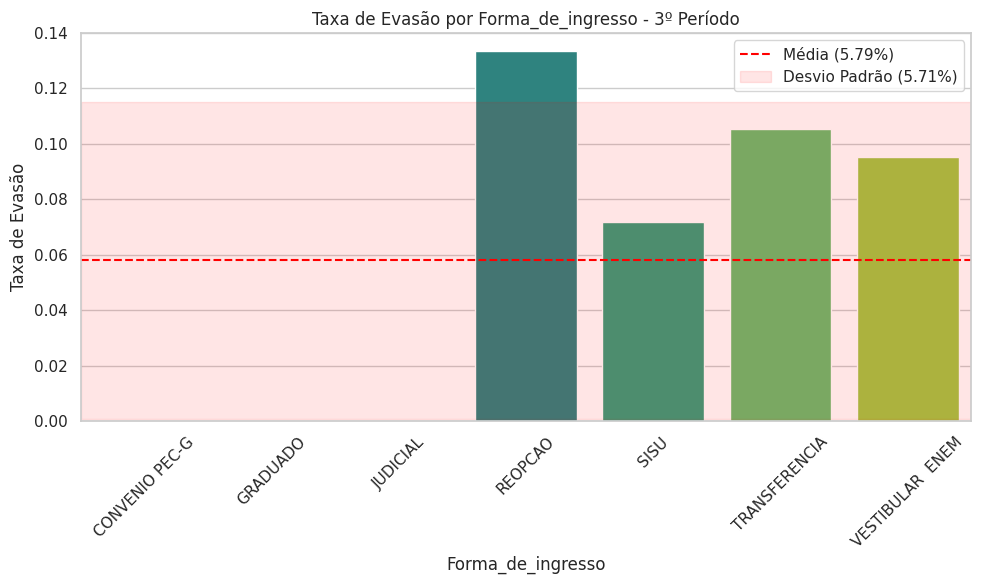

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


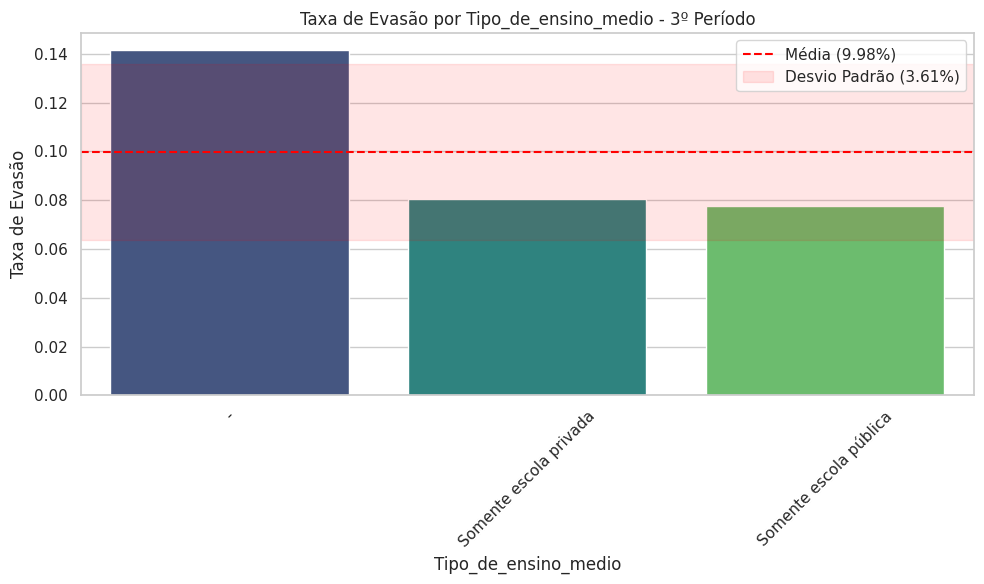

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


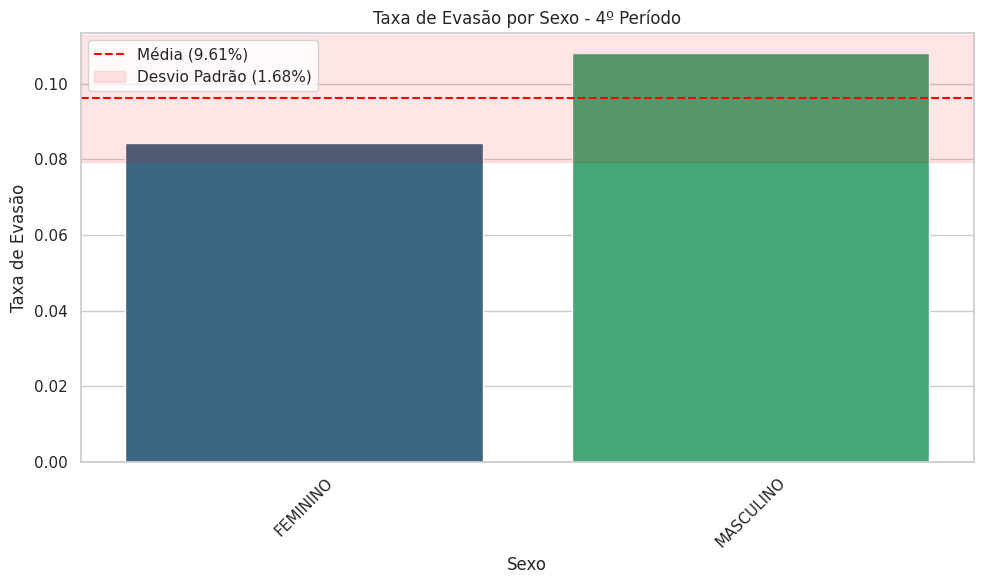

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


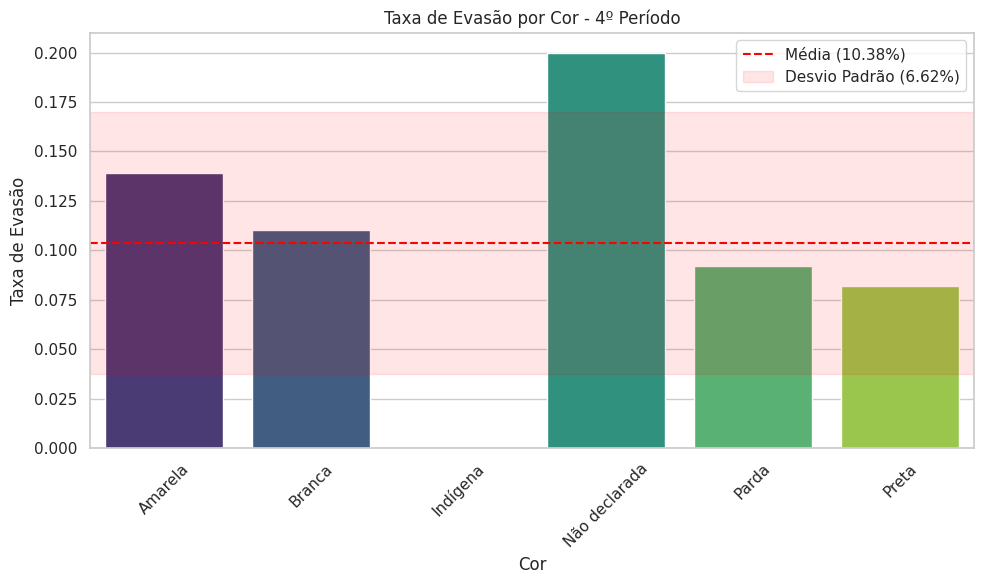

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


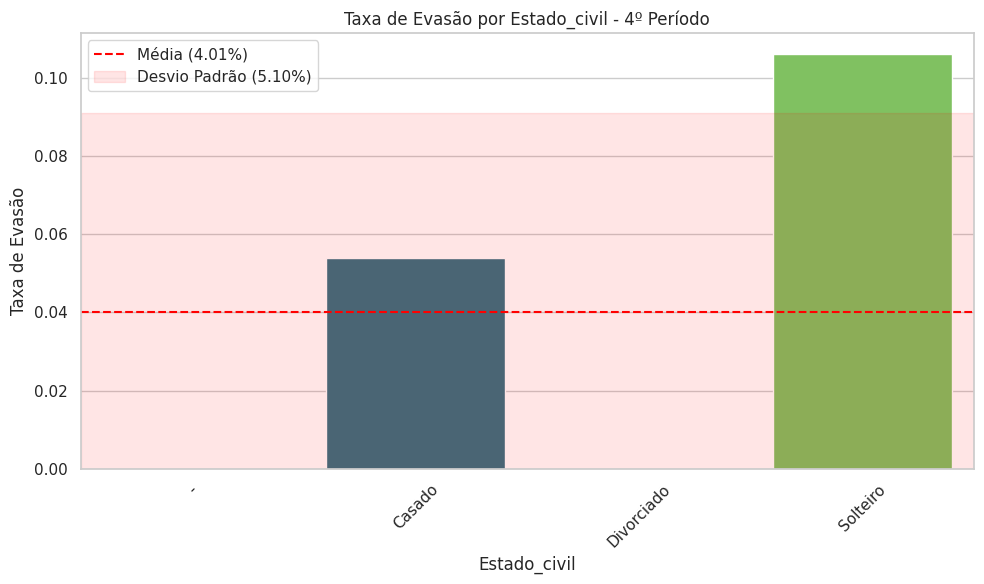

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


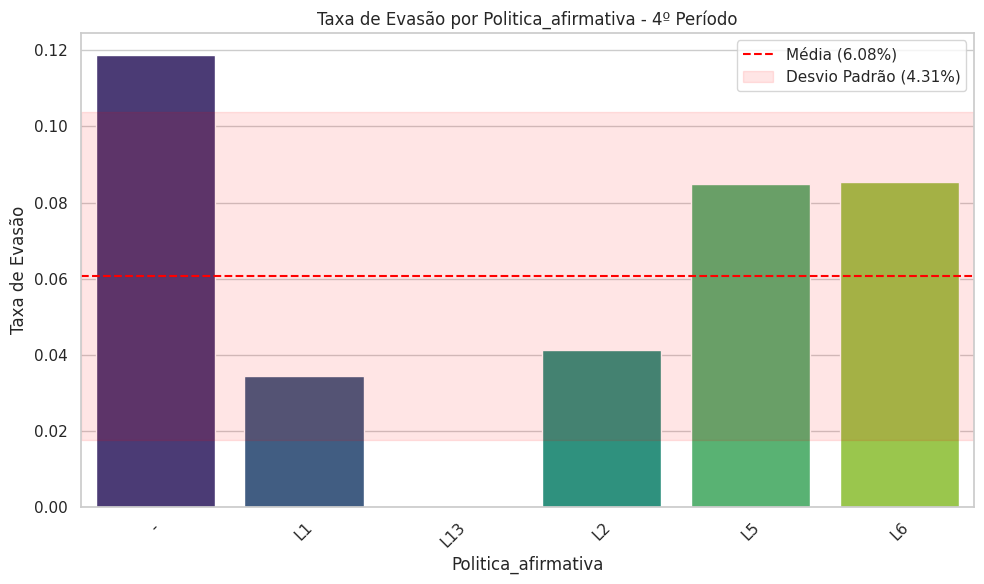

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


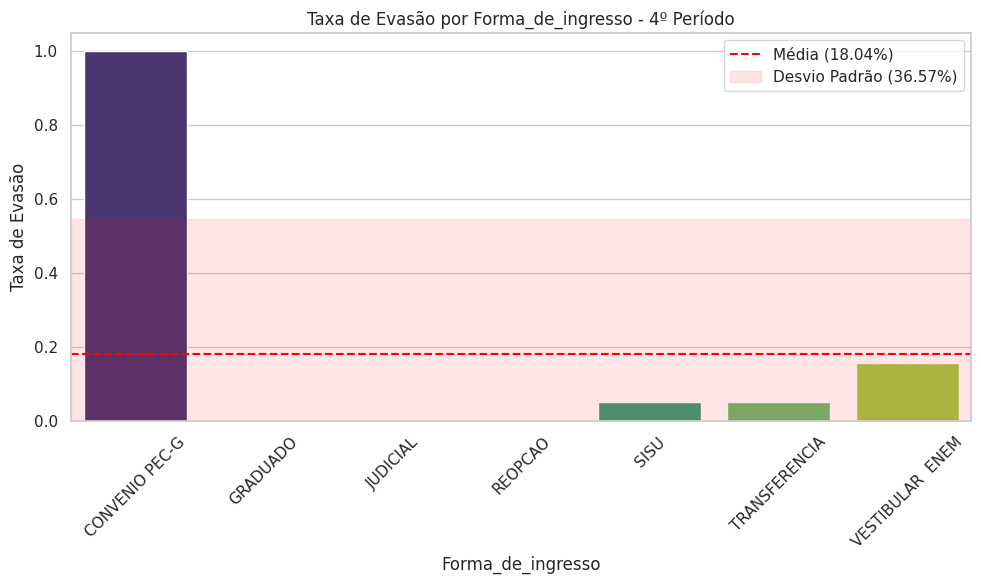

/tmp/ipykernel_30423/77109975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')


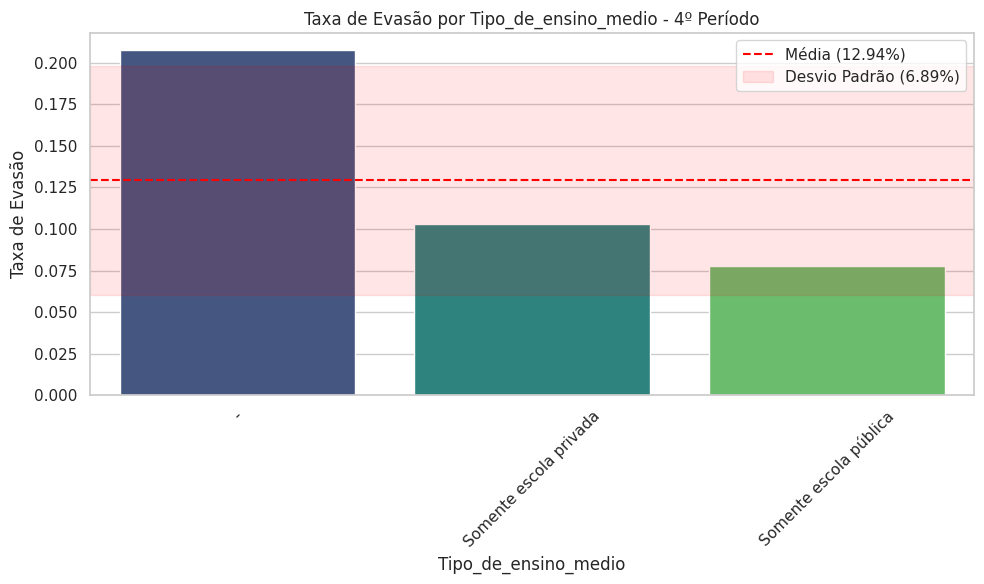

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para plotar gráfico de barras com linha da média e área do desvio padrão
def plotar_grafico(df_resultado, media, desvio, var, periodo):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=var, y='taxa_evasao', data=df_resultado, palette='viridis')

    # Linha da média
    plt.axhline(media, color='red', linestyle='--', label=f'Média ({media:.2%})')

    # Faixa de desvio padrão
    plt.axhspan(media - desvio, media + desvio, color='red', alpha=0.1, label=f'Desvio Padrão ({desvio:.2%})')

    plt.title(f'Taxa de Evasão por {var.capitalize()} - {periodo}º Período')
    plt.ylabel('Taxa de Evasão')
    plt.xlabel(var.capitalize())
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Geração dos gráficos
for periodo in range(1, 5):
    for var in variaveis:
        df_resultado, media, desvio = estatisticas_por_variavel(df_evasao, var, periodo)
        plotar_grafico(df_resultado, media, desvio, var, periodo)


### Currículo 2023: ingressantes de 2018.1 a 2022.3

### Calcular:
1)  Estatísticas de evasão ao final do primeiro período dos ingressantes entre 2018.1 e 2022.2

In [128]:
# Função para calcular o próximo período semestral
def proximo_periodo(periodo):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    if semestre == 1:
        semestre = 2
    else:
        semestre = 1
        ano += 1
    return f"{ano}.{semestre}"

# Função para calcular evasão ao final do primeiro período após ingresso
def evasao_primeiro_periodo(df, inicio='2018.1', fim='2022.2'):
    # Filtra alunos que ingressaram no intervalo
    df_filtrado = df[(df['periodo_de_ingresso'] >= inicio) & (df['periodo_de_ingresso'] <= fim)].copy()

    # Cria coluna com o período seguinte ao de ingresso
    df_filtrado['periodo_esperado_evasao'] = df_filtrado['periodo_de_ingresso'].apply(proximo_periodo)

    # Marca evasão ao final do primeiro período após ingresso
    df_filtrado['evadiu_no_primeiro_periodo'] = df_filtrado.apply(
        lambda row: (row['periodo_de_evasao'] == row['periodo_esperado_evasao']),
        axis=1
    )

    # Agrupa por período de ingresso e calcula total e evasão
    resumo = df_filtrado.groupby('periodo_de_ingresso').agg(
        total_ingressantes=('cpf', 'count'),
        total_evasao=('evadiu_no_primeiro_periodo', 'sum')
    )

    # Calcula taxa de evasão
    resumo['taxa_evasao'] = resumo['total_evasao'] / resumo['total_ingressantes']

    return resumo.reset_index()

# Usando a tabela 'alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'
tabela_alunos = tabelas['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas']
resultado = evasao_primeiro_periodo(tabela_alunos)
print(resultado)


  periodo_de_ingresso  total_ingressantes  total_evasao  taxa_evasao
0              2018.1                  93             4     0.043011
1              2018.2                  88             3     0.034091
2              2019.1                  95             3     0.031579
3              2019.2                 102             4     0.039216
4              2020.1                  99             7     0.070707
5              2020.2                  87             4     0.045977
6              2021.1                  90             4     0.044444
7              2021.2                  90             7     0.077778
8              2022.1                  87             5     0.057471
9              2022.2                  87             7     0.080460


### Grafico 

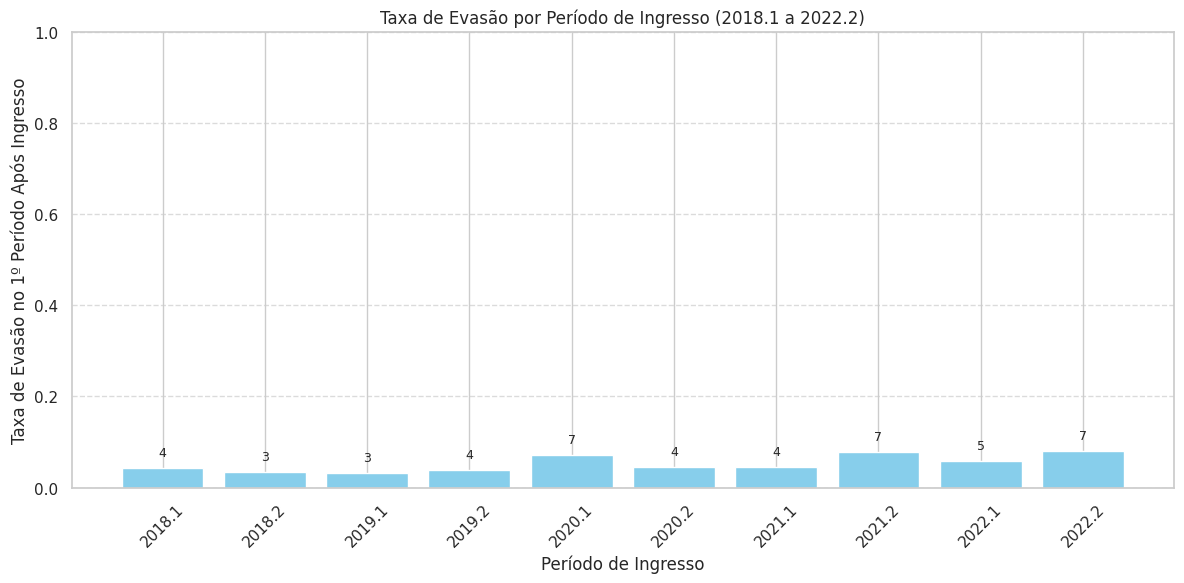

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.bar(resultado['periodo_de_ingresso'], resultado['taxa_evasao'], color='skyblue')
plt.xlabel('Período de Ingresso')
plt.ylabel('Taxa de Evasão no 1º Período Após Ingresso')
plt.title('Taxa de Evasão por Período de Ingresso (2018.1 a 2022.2)')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona o número absoluto de evadidos acima de cada barra
for bar, evadidos in zip(bars, resultado['total_evasao']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, str(evadidos), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()




### 2) As estatísticas de evasão ao final do segundo período dos ingressantes entre 2018.1 e 2022.1, ou seja, para os ingressantes em 2018.1, verificar quem evadiu no 2019.1, para os que ingressaram em 2018.2, quem evadiu no 2019.2 e assim por diante.

In [137]:
import pandas as pd

# Função para somar N períodos semestrais ao período no formato 'YYYY.S'
def somar_periodos(periodo, n=2):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    
    semestre += n
    while semestre > 2:
        semestre -= 2
        ano += 1
    
    return f"{ano}.{semestre}"

# Seleciona tabela com os dados (modifique para a que preferir)
df = tabelas['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'].copy()

# Filtra ingressos entre 2011.1 e 2017.1 (pois o segundo período precisa existir)
df = df[(df['periodo_de_ingresso'] >= '2018.2') & (df['periodo_de_ingresso'] <= '2022.1')]

# Calcula o período de evasão esperado (ingresso + 2 períodos)
df['periodo_evasao_esperado'] = df['periodo_de_ingresso'].apply(lambda x: somar_periodos(x, n=2))

# Marca se evadiu no segundo período (compara com periodo_de_evasao real)
df['evadiu_segundo_periodo'] = (df['periodo_de_evasao'] == df['periodo_evasao_esperado']).astype(int)

# Agrupa por período de ingresso, calcula taxa de evasão e total de evadidos
resultado_2p = df.groupby('periodo_de_ingresso').agg(
    total_ingressantes=('cpf', 'count'),
    total_evasao=('evadiu_segundo_periodo', 'sum')
).reset_index()

resultado_2p['taxa_evasao'] = resultado_2p['total_evasao'] / resultado_2p['total_ingressantes']

resultado_2p


,periodo_de_ingresso,total_ingressantes,total_evasao,taxa_evasao
0,2018.2,88,5,0.056818
1,2019.1,95,3,0.031579
2,2019.2,102,3,0.029412
3,2020.1,99,4,0.040404
4,2020.2,87,0,0.000000
5,2021.1,90,2,0.022222
6,2021.2,90,9,0.100000
7,2022.1,87,5,0.057471


### Grafico

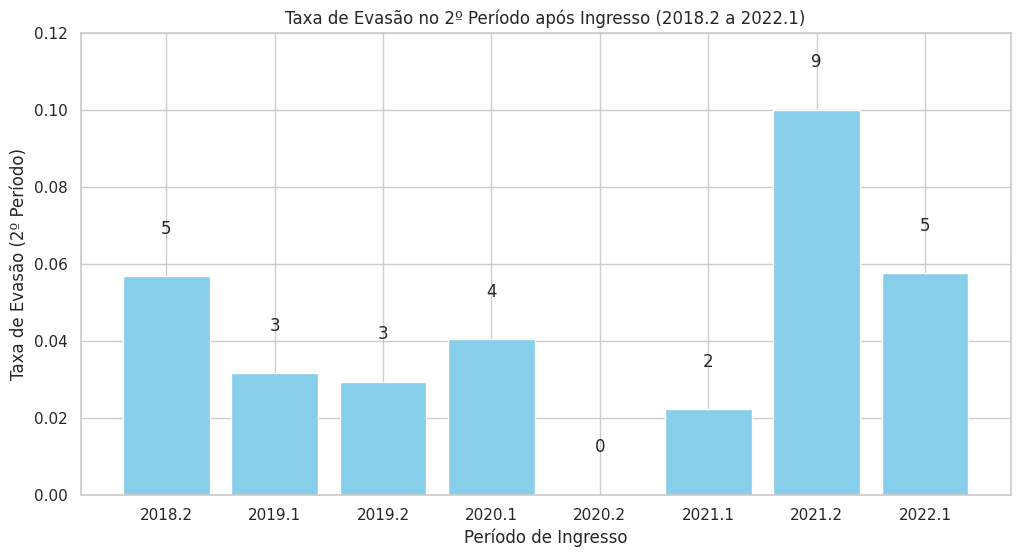

In [138]:
import matplotlib.pyplot as plt

# Usando o resultado do cálculo da evasão no segundo período (resultado_2p)

plt.figure(figsize=(12, 6))
bars = plt.bar(resultado_2p['periodo_de_ingresso'], resultado_2p['taxa_evasao'], color='skyblue')

plt.xlabel('Período de Ingresso')
plt.ylabel('Taxa de Evasão (2º Período)')
plt.title('Taxa de Evasão no 2º Período após Ingresso (2018.2 a 2022.1)')
plt.ylim(0, resultado_2p['taxa_evasao'].max() * 1.2)

# Adiciona o total de evadidos em cima de cada barra
for bar, total in zip(bars, resultado_2p['total_evasao']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, str(total), ha='center', va='bottom')

plt.show()


### 3) As estatísticas de evasão ao final do terceiro período dos ingressantes entre 2018.1 e 2023.2, ou seja, para os ingressantes em 2018.1, verificar quem evadiu no 2020.2, para os que ingressaram em 2018.2, quem evadiu no 2023.1 e assim por diante.

In [139]:
import pandas as pd

# Selecionar a tabela de alunos
df = tabelas['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'].copy()

# Função para somar períodos (ex: 2018.1 + 3 períodos = 2022.2)
def soma_periodo(periodo, n=3):
    ano, semestre = periodo.split('.')
    ano = int(ano)
    semestre = int(semestre)
    semestre += n
    while semestre > 2:
        ano += 1
        semestre -= 2
    return f"{ano}.{semestre}"

# Filtrar ingressos entre 2011.1 e 2016.2
periodos_validos = pd.date_range('2018-01-01', '2022-07-01', freq='6M').strftime('%Y.%m')
# Como os períodos estão em formato 'ano.semestre' com semestres 1 ou 2, criamos lista manual:
periodos_validos = [f"{ano}.{semestre}" for ano in range(2011, 2017) for semestre in [1, 2]]
periodos_validos = [p for p in periodos_validos if p <= '2018.2' and p >= '2022.1']

df = df[df['periodo_de_ingresso'].isin(periodos_validos)]

# Calcular o período correspondente para verificar evasão (ingresso + 3 períodos)
df['periodo_para_evasao'] = df['periodo_de_ingresso'].apply(lambda x: soma_periodo(x, 3))

# Contar total ingressantes por período
total_ingressantes = df.groupby('periodo_de_ingresso')['cpf'].nunique().reset_index(name='total_ingressantes')

# Contar total evadidos onde periodo_de_evasao == periodo_para_evasao
evasao_3p = df[df['periodo_de_evasao'] == df['periodo_para_evasao']].groupby('periodo_de_ingresso')['cpf'].nunique().reset_index(name='total_evasao')

# Juntar total ingressantes e total evadidos
resultado_3p = pd.merge(total_ingressantes, evasao_3p, on='periodo_de_ingresso', how='left')
resultado_3p['total_evasao'] = resultado_3p['total_evasao'].fillna(0).astype(int)

# Calcular taxa de evasão (%)
resultado_3p['taxa_evasao'] = (resultado_3p['total_evasao'] / resultado_3p['total_ingressantes']) * 100

resultado_3p


/tmp/ipykernel_30423/3194919704.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  periodos_validos = pd.date_range('2018-01-01', '2022-07-01', freq='6M').strftime('%Y.%m')


,periodo_de_ingresso,total_ingressantes,total_evasao,taxa_evasao


### Gráfico

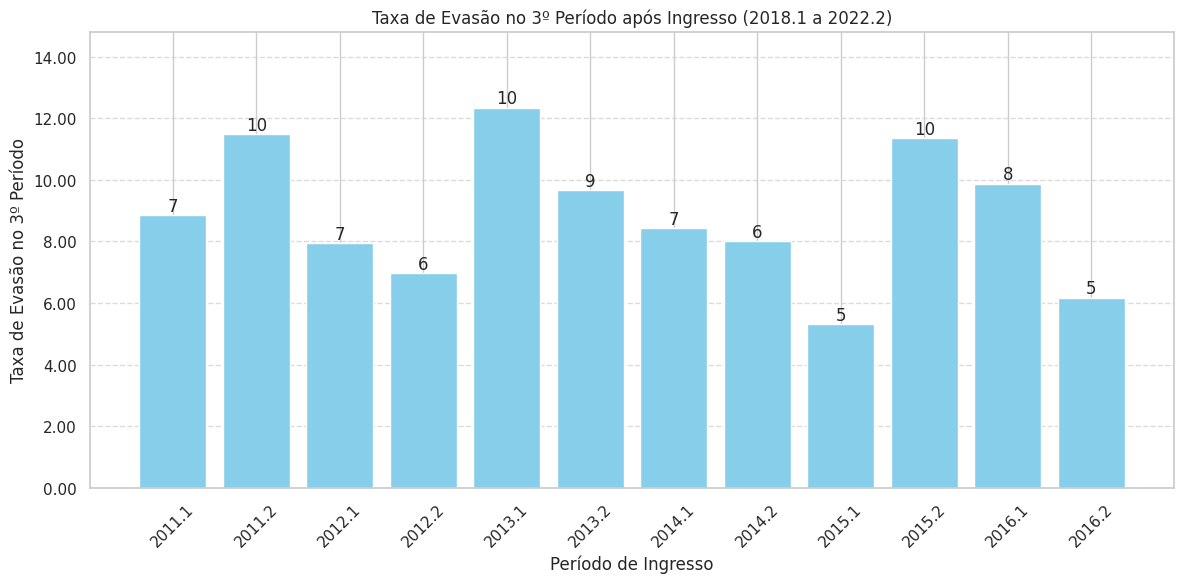

In [135]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))
bars = plt.bar(resultado_3p['periodo_de_ingresso'], resultado_3p['taxa_evasao'], color='skyblue')

plt.xlabel('Período de Ingresso')
plt.ylabel('Taxa de Evasão no 3º Período')
plt.title('Taxa de Evasão no 3º Período após Ingresso (2018.1 a 2022.2)')
plt.ylim(0, resultado_3p['taxa_evasao'].max() * 1.2)

# Formata o eixo y com números decimais
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))

# Adiciona o total de evadidos em cima de cada barra
for bar, total in zip(bars, resultado_3p['total_evasao']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, str(total), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Filtrar registros com CPF inválido (como 00000000, CPFs muito curtos ou nulos)

In [101]:
# Selecionar apenas o primeiro registro de cada CPF (caso não queira analisar diferenças entre duplicados)
df_matriculados = df_matriculados.sort_values(by='cra', ascending=False)  # Se quiser priorizar maior CRA
df_matriculados_unico = df_matriculados.drop_duplicates(subset='cpf', keep='first')


In [109]:
df_base = tabelas['alunos-novos-sem-reingressos-novos-ou-antigos-sem-metricas'].copy()

# Merge seguro (trazendo colunas adicionais, como CRA e taxa de sucesso)
df_merge = df_base.merge(tabelas['alunos-matriculados'], on='cpf', how='left')